In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.get_option('max_rows')

60

In [3]:
#### minor modifications for displaying and analyzing the data
pd.set_option('max_rows',90)
pd.set_option('max_columns',100)

In [4]:
pd.get_option('max_columns')

100

### Index
1. Loading the data<br>
-  Data Cleanup <br>
    -Nulls Handling<br>
    -Target column transformation<br>
    -Identifying and Dropping Columns with highly Singular data <br>
    -Data Coversion --- Normalizing the dates<br>
-  Adding Derived Columns<br>
-  Analyzing the Individual columns - and Outlier Handling<br>
-  Data preparation<br>
    -Convert categorical into dummies 
-  Model Building and Evaluation<br>
    -Ridge<br> 
    -Model Interpretation <br>
    -Lasso <br>
    -Model Interpretation <br>
-  Subjective Questions Portion<br>

### Loading the data

In [5]:
surprise_Housing_df = pd.read_csv("train.csv")

In [6]:
surprise_Housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
surprise_Housing_df.shape

(1460, 81)

In [8]:
surprise_Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Cleanup

#### Nulls Handling

In [9]:
surprise_Housing_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

#### Looking at the dictionary for some categorical columns there was NA value which had some other strings given e.g. <br>
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access


Replacing Columns like these.

In [10]:
surprise_Housing_df['Alley'].fillna('No alley access' , inplace = True)

In [11]:
surprise_Housing_df['BsmtQual'].fillna('No Basement' ,inplace=True)

In [12]:
surprise_Housing_df['BsmtCond'].fillna('No Basement' ,inplace=True)

In [13]:
surprise_Housing_df['BsmtExposure'].fillna('No Basement' ,inplace=True)

In [14]:
surprise_Housing_df['BsmtFinType1'].fillna('No Basement' ,inplace=True)

In [15]:
surprise_Housing_df['BsmtFinType2'].fillna('No Basement' ,inplace=True)

In [16]:
surprise_Housing_df['GarageType'].fillna('No Garage' ,inplace=True)

In [17]:
surprise_Housing_df['GarageFinish'].fillna('No Garage' ,inplace=True)

In [18]:
surprise_Housing_df['GarageQual'].fillna('No Garage' ,inplace=True)

In [19]:
surprise_Housing_df['GarageCond'].fillna('No Garage' ,inplace=True)

In [20]:
surprise_Housing_df['PoolQC'].fillna('No Pool' ,inplace=True)

In [21]:
surprise_Housing_df['Fence'].fillna('No Fence' ,inplace=True)

In [22]:
surprise_Housing_df['MiscFeature'].fillna('None' ,inplace=True)

In [23]:
surprise_Housing_df['FireplaceQu'].fillna('No Fireplace' ,inplace=True)

In [24]:
surprise_Housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

#### We can see that most of the nulls have been resolved, Now will look into the remaining nulls.

In [25]:
surprise_Housing_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

#### LotFrontage is:  Linear feet of street connected to property . Therefore let's replace nulls with 0

In [26]:
surprise_Housing_df['LotFrontage'].fillna(0,inplace =True)

In [27]:
surprise_Housing_df.loc[surprise_Housing_df['GarageYrBlt'].isnull()].GarageType.unique()

array(['No Garage'], dtype=object)

##### We can see that for the GarageYrBlt column all the nulls are because of the missing garage.

In [28]:
surprise_Housing_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

#### I am converting the year columns to the min value for that column as in the end i am going to normalize the value.

In [29]:
surprise_Housing_df['GarageYrBlt'].fillna(surprise_Housing_df['GarageYrBlt'].min(),inplace =True)

In [30]:
surprise_Housing_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1900., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1979.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

##### Also we can see that the MasVnrType and MasVnrArea have equal numberof nulls and MasVnrType None  is None so let's replace those values.

In [31]:
surprise_Housing_df['MasVnrType'].fillna('None',inplace=True)

In [32]:
surprise_Housing_df['MasVnrArea'].fillna(0,inplace=True)

In [33]:
surprise_Housing_df[surprise_Housing_df['Electrical'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No Fireplace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No Pool,No Fence,None,0,5,2008,WD,Normal,167500


In [34]:
surprise_Housing_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Most of the values are SBrkr so we will replace that with the null

In [35]:
surprise_Housing_df['Electrical'] = surprise_Housing_df['Electrical'].replace(np.NaN,'SBrkr')

In [36]:
surprise_Housing_df.loc[1379]['Electrical']

'SBrkr'

In [37]:
surprise_Housing_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

##### Now we have handled all the missing data.

#### Target column transformation

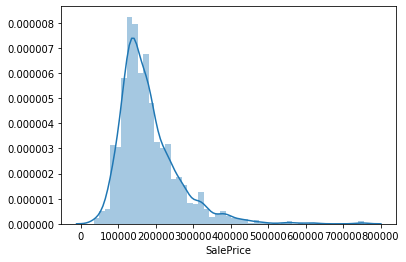

In [38]:
### first of all checking the skewness of the target column
sns.distplot(surprise_Housing_df['SalePrice'])
plt.show()

##### We can see that this data is little skewed so we will take a log of these values and use that for modelling

In [39]:
surprise_Housing_df['SalePrice_log'] = np.log(surprise_Housing_df['SalePrice'])

In [40]:
surprise_Housing_df['SalePrice_log'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice_log, dtype: float64

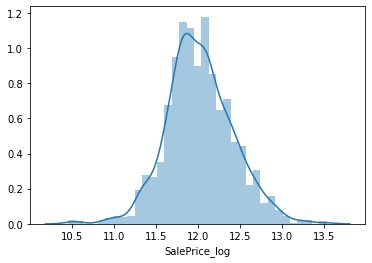

In [41]:
sns.distplot(surprise_Housing_df['SalePrice_log'])
plt.show()


#### This looks like a lot like normal distribution now.

In [42]:
surprise_Housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


In [43]:
surprise_Housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Identifying and Dropping Columns with highly Singular data

In [44]:
round((surprise_Housing_df['MSSubClass'].value_counts()/1460)*100,2).head(2) 

20    36.71
60    20.48
Name: MSSubClass, dtype: float64

In [45]:
round((surprise_Housing_df['MSZoning'].value_counts()/1460)*100,2).head(2)

RL    78.84
RM    14.93
Name: MSZoning, dtype: float64

In [46]:
round((surprise_Housing_df['LotFrontage'].value_counts()/1460)*100,2).head(2)

0.0     17.74
60.0     9.79
Name: LotFrontage, dtype: float64

In [47]:
round((surprise_Housing_df['LotArea'].value_counts()/1460)*100,2).head(2)

7200    1.71
9600    1.64
Name: LotArea, dtype: float64

In [48]:
round((surprise_Housing_df['Street'].value_counts()/1460)*100,2).head(2)

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

In [49]:
round((surprise_Housing_df['Alley'].value_counts()/1460)*100,2).head()

No alley access    93.77
Grvl                3.42
Pave                2.81
Name: Alley, dtype: float64

In [50]:
round((surprise_Housing_df['LotShape'].value_counts()/1460)*100,2).head(2)

Reg    63.36
IR1    33.15
Name: LotShape, dtype: float64

In [51]:
round((surprise_Housing_df['LandContour'].value_counts()/1460)*100,2).head(2)

Lvl    89.79
Bnk     4.32
Name: LandContour, dtype: float64

In [52]:
round((surprise_Housing_df['Utilities'].value_counts()/1460)*100,2)

AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64

In [53]:
round((surprise_Housing_df['LotConfig'].value_counts()/1460)*100,2).head(2)

Inside    72.05
Corner    18.01
Name: LotConfig, dtype: float64

In [54]:
round((surprise_Housing_df['LandSlope'].value_counts()/1460)*100,2)

Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64

In [55]:
round((surprise_Housing_df['Neighborhood'].value_counts()/1460)*100,2).head(2)

NAmes      15.41
CollgCr    10.27
Name: Neighborhood, dtype: float64

In [56]:
round((surprise_Housing_df['Condition1'].value_counts()/1460)*100,2).head(2)

Norm     86.30
Feedr     5.55
Name: Condition1, dtype: float64

In [57]:
round((surprise_Housing_df['Condition2'].value_counts()/1460)*100,2).head(2)

Norm     98.97
Feedr     0.41
Name: Condition2, dtype: float64

In [58]:
round((surprise_Housing_df['BldgType'].value_counts()/1460)*100,2).head(2)

1Fam      83.56
TwnhsE     7.81
Name: BldgType, dtype: float64

In [59]:
round((surprise_Housing_df['HouseStyle'].value_counts()/1460)*100,2).head(2)

1Story    49.73
2Story    30.48
Name: HouseStyle, dtype: float64

In [60]:
round((surprise_Housing_df['OverallQual'].value_counts()/1460)*100,2).head(2)

5    27.19
6    25.62
Name: OverallQual, dtype: float64

In [61]:
round((surprise_Housing_df['OverallCond'].value_counts()/1460)*100,2).head(2)

5    56.23
6    17.26
Name: OverallCond, dtype: float64

In [62]:
round((surprise_Housing_df['YearBuilt'].value_counts()/1460)*100,2).head(2)

2006    4.59
2005    4.38
Name: YearBuilt, dtype: float64

In [63]:
round((surprise_Housing_df['YearRemodAdd'].value_counts()/1460)*100,2).head(2)

1950    12.19
2006     6.64
Name: YearRemodAdd, dtype: float64

In [64]:
round((surprise_Housing_df['RoofStyle'].value_counts()/1460)*100,2).head(2)

Gable    78.15
Hip      19.59
Name: RoofStyle, dtype: float64

In [65]:
round((surprise_Housing_df['RoofMatl'].value_counts()/1460)*100,2).head(2)

CompShg    98.22
Tar&Grv     0.75
Name: RoofMatl, dtype: float64

In [66]:
round((surprise_Housing_df['Exterior1st'].value_counts()/1460)*100,2).head(2)

VinylSd    35.27
HdBoard    15.21
Name: Exterior1st, dtype: float64

In [67]:
round((surprise_Housing_df['Exterior2nd'].value_counts()/1460)*100,2).head(2)

VinylSd    34.52
MetalSd    14.66
Name: Exterior2nd, dtype: float64

In [68]:
round((surprise_Housing_df['MasVnrType'].value_counts()/1460)*100,2).head(2)

None       59.73
BrkFace    30.48
Name: MasVnrType, dtype: float64

In [69]:
round((surprise_Housing_df['MasVnrArea'].value_counts()/1460)*100,2).head(2)

0.0     59.52
72.0     0.55
Name: MasVnrArea, dtype: float64

In [70]:
round((surprise_Housing_df['ExterQual'].value_counts()/1460)*100,2).head(2)

TA    62.05
Gd    33.42
Name: ExterQual, dtype: float64

In [71]:
round((surprise_Housing_df['ExterCond'].value_counts()/1460)*100,2).head(2)

TA    87.81
Gd    10.00
Name: ExterCond, dtype: float64

In [72]:
round((surprise_Housing_df['Foundation'].value_counts()/1460)*100,2).head(2)

PConc     44.32
CBlock    43.42
Name: Foundation, dtype: float64

In [73]:
round((surprise_Housing_df['BsmtQual'].value_counts()/1460)*100,2).head(2)

TA    44.45
Gd    42.33
Name: BsmtQual, dtype: float64

In [74]:
round((surprise_Housing_df['BsmtCond'].value_counts()/1460)*100,2).head(2)

TA    89.79
Gd     4.45
Name: BsmtCond, dtype: float64

In [75]:
round((surprise_Housing_df['BsmtExposure'].value_counts()/1460)*100,2).head(2)

No    65.27
Av    15.14
Name: BsmtExposure, dtype: float64

In [76]:
round((surprise_Housing_df['BsmtFinType1'].value_counts()/1460)*100,2).head(2)

Unf    29.45
GLQ    28.63
Name: BsmtFinType1, dtype: float64

In [77]:
round((surprise_Housing_df['BsmtFinSF1'].value_counts()/1460)*100,2).head(2)

0     31.99
24     0.82
Name: BsmtFinSF1, dtype: float64

In [78]:
round((surprise_Housing_df['BsmtFinType2'].value_counts()/1460)*100,2).head(2)

Unf    86.03
Rec     3.70
Name: BsmtFinType2, dtype: float64

In [79]:
round((surprise_Housing_df['BsmtFinSF2'].value_counts()/1460)*100,2).head(2)

0      88.56
180     0.34
Name: BsmtFinSF2, dtype: float64

In [80]:
round((surprise_Housing_df['BsmtUnfSF'].value_counts()/1460)*100,2).head(2)

0      8.08
728    0.62
Name: BsmtUnfSF, dtype: float64

In [81]:
round((surprise_Housing_df['TotalBsmtSF'].value_counts()/1460)*100,2).head(2)

0      2.53
864    2.40
Name: TotalBsmtSF, dtype: float64

In [82]:
round((surprise_Housing_df['Heating'].value_counts()/1460)*100,2).head(2)

GasA    97.81
GasW     1.23
Name: Heating, dtype: float64

In [83]:
round((surprise_Housing_df['HeatingQC'].value_counts()/1460)*100,2).head(2)

Ex    50.75
TA    29.32
Name: HeatingQC, dtype: float64

In [84]:
round((surprise_Housing_df['CentralAir'].value_counts()/1460)*100,2).head(2)

Y    93.49
N     6.51
Name: CentralAir, dtype: float64

In [85]:
round((surprise_Housing_df['Electrical'].value_counts()/1460)*100,2).head(2)

SBrkr    91.44
FuseA     6.44
Name: Electrical, dtype: float64

In [86]:
round((surprise_Housing_df['1stFlrSF'].value_counts()/1460)*100,2).head(2)

864     1.71
1040    1.10
Name: 1stFlrSF, dtype: float64

In [87]:
round((surprise_Housing_df['2ndFlrSF'].value_counts()/1460)*100,2).head(2)

0      56.78
728     0.68
Name: 2ndFlrSF, dtype: float64

In [88]:
round((surprise_Housing_df['LowQualFinSF'].value_counts()/1460)*100,2).head(2)

0     98.22
80     0.21
Name: LowQualFinSF, dtype: float64

In [89]:
round((surprise_Housing_df['GrLivArea'].value_counts()/1460)*100,2).head(2)

864     1.51
1040    0.96
Name: GrLivArea, dtype: float64

In [90]:
round((surprise_Housing_df['BsmtFullBath'].value_counts()/1460)*100,2).head(2)

0    58.63
1    40.27
Name: BsmtFullBath, dtype: float64

In [91]:
round((surprise_Housing_df['BsmtHalfBath'].value_counts()/1460)*100,2).head(2)

0    94.38
1     5.48
Name: BsmtHalfBath, dtype: float64

In [92]:
round((surprise_Housing_df['HalfBath'].value_counts()/1460)*100,2).head(2)

0    62.53
1    36.64
Name: HalfBath, dtype: float64

In [93]:
round((surprise_Housing_df['BedroomAbvGr'].value_counts()/1460)*100,2).head(2)

3    55.07
2    24.52
Name: BedroomAbvGr, dtype: float64

In [94]:
round((surprise_Housing_df['KitchenAbvGr'].value_counts()/1460)*100,2).head(2)

1    95.34
2     4.45
Name: KitchenAbvGr, dtype: float64

In [95]:
round((surprise_Housing_df['KitchenQual'].value_counts()/1460)*100,2).head(2)

TA    50.34
Gd    40.14
Name: KitchenQual, dtype: float64

In [96]:
round((surprise_Housing_df['TotRmsAbvGrd'].value_counts()/1460)*100,2).head(2)

6    27.53
7    22.53
Name: TotRmsAbvGrd, dtype: float64

In [97]:
round((surprise_Housing_df['Functional'].value_counts()/1460)*100,2).head(2)

Typ     93.15
Min2     2.33
Name: Functional, dtype: float64

In [98]:
round((surprise_Housing_df['Fireplaces'].value_counts()/1460)*100,2).head(2)

0    47.26
1    44.52
Name: Fireplaces, dtype: float64

In [99]:
round((surprise_Housing_df['FireplaceQu'].value_counts()/1460)*100,2).head(2)

No Fireplace    47.26
Gd              26.03
Name: FireplaceQu, dtype: float64

In [100]:
round((surprise_Housing_df['GarageType'].value_counts()/1460)*100,2).head(2)

Attchd    59.59
Detchd    26.51
Name: GarageType, dtype: float64

In [101]:
round((surprise_Housing_df['GarageYrBlt'].value_counts()/1460)*100,2).head(2)

1900.0    5.62
2005.0    4.45
Name: GarageYrBlt, dtype: float64

In [102]:
round((surprise_Housing_df['GarageFinish'].value_counts()/1460)*100,2).head(2)

Unf    41.44
RFn    28.90
Name: GarageFinish, dtype: float64

In [103]:
round((surprise_Housing_df['GarageCars'].value_counts()/1460)*100,2).head(2)

2    56.44
1    25.27
Name: GarageCars, dtype: float64

In [104]:
round((surprise_Housing_df['GarageArea'].value_counts()/1460)*100,2).head(2)

0      5.55
440    3.36
Name: GarageArea, dtype: float64

In [105]:
round((surprise_Housing_df['GarageQual'].value_counts()/1460)*100,2).head(2)

TA           89.79
No Garage     5.55
Name: GarageQual, dtype: float64

In [106]:
round((surprise_Housing_df['GarageCond'].value_counts()/1460)*100,2).head(2)

TA           90.82
No Garage     5.55
Name: GarageCond, dtype: float64

In [107]:
round((surprise_Housing_df['PavedDrive'].value_counts()/1460)*100,2).head(2)

Y    91.78
N     6.16
Name: PavedDrive, dtype: float64

In [108]:
round((surprise_Housing_df['WoodDeckSF'].value_counts()/1460)*100,2).head(2)

0      52.12
192     2.60
Name: WoodDeckSF, dtype: float64

In [109]:
round((surprise_Housing_df['OpenPorchSF'].value_counts()/1460)*100,2).head(2)

0     44.93
36     1.99
Name: OpenPorchSF, dtype: float64

In [110]:
round((surprise_Housing_df['EnclosedPorch'].value_counts()/1460)*100,2).head(2)

0      85.75
112     1.03
Name: EnclosedPorch, dtype: float64

In [111]:
round((surprise_Housing_df['3SsnPorch'].value_counts()/1460)*100,2).head(2)

0      98.36
168     0.21
Name: 3SsnPorch, dtype: float64

In [112]:
round((surprise_Housing_df['ScreenPorch'].value_counts()/1460)*100,2).head(2)

0      92.05
192     0.41
Name: ScreenPorch, dtype: float64

In [113]:
round((surprise_Housing_df['PoolArea'].value_counts()/1460)*100,2).head(2)

0      99.52
738     0.07
Name: PoolArea, dtype: float64

In [114]:
round((surprise_Housing_df['PoolQC'].value_counts()/1460)*100,2)

No Pool    99.52
Gd          0.21
Fa          0.14
Ex          0.14
Name: PoolQC, dtype: float64

In [115]:
round((surprise_Housing_df['Fence'].value_counts()/1460)*100,2).head(2)

No Fence    80.75
MnPrv       10.75
Name: Fence, dtype: float64

In [116]:
round((surprise_Housing_df['MiscFeature'].value_counts()/1460)*100,2).head(2)

None    96.30
Shed     3.36
Name: MiscFeature, dtype: float64

In [117]:
round((surprise_Housing_df['MiscVal'].value_counts()/1460)*100,2).head(2)

0      96.44
400     0.75
Name: MiscVal, dtype: float64

In [118]:
round((surprise_Housing_df['MoSold'].value_counts()/1460)*100,2).head(2)

6    17.33
7    16.03
Name: MoSold, dtype: float64

In [119]:
round((surprise_Housing_df['YrSold'].value_counts()/1460)*100,2).head(2)

2009    23.15
2007    22.53
Name: YrSold, dtype: float64

In [120]:
round((surprise_Housing_df['SaleType'].value_counts()/1460)*100,2).head(2)

WD     86.78
New     8.36
Name: SaleType, dtype: float64

In [121]:
round((surprise_Housing_df['SaleCondition'].value_counts()/1460)*100,2).head(2)

Normal     82.05
Partial     8.56
Name: SaleCondition, dtype: float64

In [122]:
round((surprise_Housing_df['SalePrice_log'].value_counts()/1460)*100,2).head(2)

11.849398    1.37
11.813030    1.16
Name: SalePrice_log, dtype: float64

### Dropping Columns with highly Singular data

#### Base on above analysis some columns with highly singular data are

MiscVal       0          96.44<br>
MiscFeature   None       96.30<br>
PoolQC        No Pool    99.52<br>
PoolArea      No Pool    99.52<br>
3SsnPorch     0          98.36<br>
LowQualFinSF  0          98.22<br>
RoofMatl      CompShg    98.22<br>
Condition2    Norm       98.97<br>
Utilities     AllPub     99.93<br>
Street        Pave       99.59<br>

#### Let's remove the columns which have more than 98% of data as singular values

In [123]:
surprise_Housing_df.shape

(1460, 82)

In [124]:
#### Dropping the id column along with the other columns with more than 98% similar values
surprise_Housing_df.drop(['Id','PoolQC','PoolArea','3SsnPorch','LowQualFinSF','RoofMatl','Condition2' ,'Utilities','Street'],axis = 1, inplace=True)

In [125]:
surprise_Housing_df.shape

(1460, 73)

In [126]:
#### the score on the ridge and lasso both methods dropped so ignoring this.
#### Dropping the columns with more than 90% similar values
###surprise_Housing_df.drop(['Alley','LandSlope','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','GarageCond','PavedDrive','ScreenPorch','MiscFeature','MiscVal'],axis = 1, inplace=True)

### Data Conversion

#### Normalizing the dates

In [127]:
surprise_Housing_df['GarageYrBlt'] = surprise_Housing_df['GarageYrBlt'].max() - surprise_Housing_df['GarageYrBlt']

In [128]:
surprise_Housing_df['GarageYrBlt'].unique()

array([  7.,  34.,   9.,  12.,  10.,  17.,   6.,  37.,  79.,  71.,  45.,
         5.,  48.,   4.,  50.,  19.,  40.,  43.,  52.,  80.,   8.,  42.,
         3.,   2.,  53.,  90.,  44.,  51.,  15.,  56.,  57., 110.,  27.,
        33.,  13.,  25.,  47.,  29.,  46.,  11.,  75.,  20.,  65.,  23.,
        21.,  95.,  54.,  62.,  36.,   1.,  60.,  49.,  89.,  31.,  59.,
        41.,  74.,  35.,  39.,  87.,  26.,  84.,  55.,  24.,  22.,  94.,
        78.,  38.,  92.,  30.,  86.,  14.,  70.,  61.,  16., 100.,  32.,
        28.,  18.,  85.,  69.,   0.,  83.,  63.,  73.,  68.,  72.,  58.,
        82.,  88.,  76., 104.,  96.,  64., 102.,  81.,  77.])

In [129]:
surprise_Housing_df['YearBuilt'] = surprise_Housing_df['YearBuilt'].max() - surprise_Housing_df['YearBuilt']

In [130]:
surprise_Housing_df['YearRemodAdd'] = surprise_Housing_df['YearRemodAdd'].max() - surprise_Housing_df['YearRemodAdd']

In [131]:
surprise_Housing_df['YrSold'] = surprise_Housing_df['YrSold'].max() - surprise_Housing_df['YrSold']

In [132]:
## Looking at all the numeric columns
surprise_Housing_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,38.732192,25.134247,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,35.849315,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,43.489041,6.321918,2.184247,180921.195890,12.024051
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,29.982047,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,496.123024,2.703626,1.328095,79442.502883,0.399452
min,20.000000,0.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,34900.000000,10.460242
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,10.000000,6.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,9.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,129975.000000,11.775097
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,37.000000,16.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,33.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,6.000000,2.000000,163000.000000,12.001505
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,56.000000,43.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,52.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,8.000000,3.000000,214000.000000,12.273731
max,190.000000,313.000000,215245.000000,10.000000,9.000000,138.000000,60.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,110.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,15500.000000,12.000000,4.000000,755000.000000,13.534473


### Adding Derived Columns

In [133]:
surprise_Housing_df['TotalBathrooms'] = surprise_Housing_df['BsmtFullBath'] + ( (  surprise_Housing_df['BsmtHalfBath'] + surprise_Housing_df['HalfBath'])* .5 )  + surprise_Housing_df['FullBath']

In [134]:
surprise_Housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,7,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,7.0,RFn,2,548,TA,TA,Y,0,61,0,0,No Fence,None,0,2,2,WD,Normal,208500,12.247694,3.5
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,34,34,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,34.0,RFn,2,460,TA,TA,Y,298,0,0,0,No Fence,None,0,5,3,WD,Normal,181500,12.109011,2.5
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,9,8,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,9.0,RFn,2,608,TA,TA,Y,0,42,0,0,No Fence,None,0,9,2,WD,Normal,223500,12.317167,3.5
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,95,40,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,12.0,Unf,3,642,TA,TA,Y,0,35,272,0,No Fence,None,0,2,4,WD,Abnorml,140000,11.849398,2.0
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,10,10,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,10.0,RFn,3,836,TA,TA,Y,192,84,0,0,No Fence,None,0,12,2,WD,Normal,250000,12.429216,3.5


In [135]:
surprise_Housing_df['TotalArea'] = surprise_Housing_df['GrLivArea'] + surprise_Housing_df['TotalBsmtSF']

### Data Reorganization

#### Converting numberical columns which hold categorical data to object datatype

In [136]:
surprise_Housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
0,60,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,7,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,7.0,RFn,2,548,TA,TA,Y,0,61,0,0,No Fence,None,0,2,2,WD,Normal,208500,12.247694,3.5,2566
1,20,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,34,34,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,34.0,RFn,2,460,TA,TA,Y,298,0,0,0,No Fence,None,0,5,3,WD,Normal,181500,12.109011,2.5,2524
2,60,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,9,8,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,9.0,RFn,2,608,TA,TA,Y,0,42,0,0,No Fence,None,0,9,2,WD,Normal,223500,12.317167,3.5,2706
3,70,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,95,40,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,12.0,Unf,3,642,TA,TA,Y,0,35,272,0,No Fence,None,0,2,4,WD,Abnorml,140000,11.849398,2.0,2473
4,60,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,10,10,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,10.0,RFn,3,836,TA,TA,Y,192,84,0,0,No Fence,None,0,12,2,WD,Normal,250000,12.429216,3.5,3343


In [137]:
surprise_Housing_df['MSSubClass'] = surprise_Housing_df['MSSubClass'].astype('object')
surprise_Housing_df['OverallCond'] = surprise_Housing_df['OverallCond'].astype('object')
surprise_Housing_df['OverallQual'] = surprise_Housing_df['OverallQual'].astype('object')
surprise_Housing_df['MoSold'] = surprise_Housing_df['MoSold'].astype('object')

In [138]:
surprise_Housing_numeric_df = surprise_Housing_df.select_dtypes(include = ['int64','float64'])
surprise_Housing_numeric_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
0,65.0,8450,7,7,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,7.0,2,548,0,61,0,0,0,2,208500,12.247694,3.5,2566
1,80.0,9600,34,34,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,34.0,2,460,298,0,0,0,0,3,181500,12.109011,2.5,2524
2,68.0,11250,9,8,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,9.0,2,608,0,42,0,0,0,2,223500,12.317167,3.5,2706
3,60.0,9550,95,40,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,12.0,3,642,0,35,272,0,0,4,140000,11.849398,2.0,2473
4,84.0,14260,10,10,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,10.0,3,836,192,84,0,0,0,2,250000,12.429216,3.5,3343


In [139]:
surprise_Housing_numeric_df.shape

(1460, 33)

In [140]:
cols  =  surprise_Housing_numeric_df.columns
cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'YrSold',
       'SalePrice', 'SalePrice_log', 'TotalBathrooms', 'TotalArea'],
      dtype='object')

### Analyzing the Individual columns - and Outlier Handling

#### Plotting the various numberical columns and checking their values for sale prices

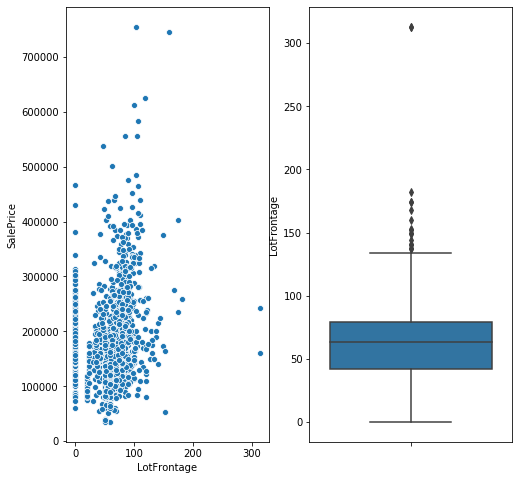

In [141]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['LotFrontage'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['LotFrontage'])
plt.show()

#### We can see there are some outlier values, we will remove them.

In [142]:
Q1 = surprise_Housing_df['LotFrontage'].quantile(0.1)
Q3 = surprise_Housing_df['LotFrontage'].quantile(0.9)
IQR = Q3 - Q1

In [143]:
surprise_Housing_df[surprise_Housing_df['LotFrontage'] >= Q3 + 1.5*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
934,20,RL,313.0,27650,No alley access,IR2,HLS,Inside,Mod,NAmes,PosA,1Fam,1Story,7,7,50,3,Flat,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425,Unf,0,160,585,GasA,Ex,Y,SBrkr,2069,0,2069,1,0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,50.0,RFn,2,505,TA,TA,Y,0,0,0,0,No Fence,None,0,11,2,WD,Normal,242000,12.396693,3.0,2654
1298,60,RL,313.0,63887,No alley access,IR3,Bnk,Corner,Gtl,Edwards,Feedr,1Fam,2Story,10,5,2,2,Hip,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2.0,Fin,2,1418,TA,TA,Y,214,292,0,0,No Fence,None,0,1,2,New,Partial,160000,11.982929,4.5,11752


In [144]:
Q1 = surprise_Housing_df['LotFrontage'].quantile(0.1)
Q3 = surprise_Housing_df['LotFrontage'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df = surprise_Housing_df[(surprise_Housing_df['LotFrontage'] >= Q1 - 1.5*IQR) & 
                      (surprise_Housing_df['LotFrontage'] <= Q3 + 1.5*IQR)]

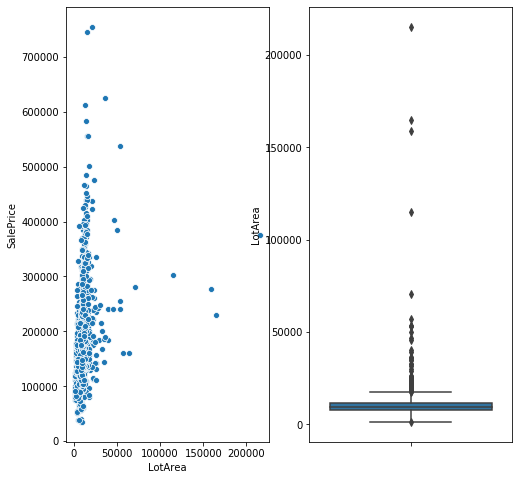

In [145]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['LotArea'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['LotArea'])
plt.show()

In [146]:
### there were too many records being removed if I used 1.5*IQR to remove the outliers therefore I chose 5*IQR to remove only the outermost outliers

Q1 = surprise_Housing_df['LotArea'].quantile(0.1)
Q3 = surprise_Housing_df['LotArea'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['LotArea'] >= Q3 + 5*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
249,50,RL,0.0,159000,No alley access,IR2,Low,CulDSac,Sev,ClearCr,Norm,1Fam,1.5Fin,6,7,52,4,Gable,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,52.0,Fin,2,389,TA,TA,Y,0,98,0,0,No Fence,Shed,500,6,3,WD,Normal,277000,12.531773,2.5,3588
313,20,RL,150.0,215245,No alley access,IR3,Low,Inside,Sev,Timber,Norm,1Fam,1Story,7,5,45,45,Hip,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,45.0,RFn,2,513,TA,TA,Y,0,0,0,0,No Fence,None,0,6,1,WD,Normal,375000,12.834681,4.0,4172
335,190,RL,0.0,164660,No alley access,IR1,HLS,Corner,Sev,Timber,Norm,2fmCon,1.5Fin,5,6,45,45,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,45.0,Fin,2,529,TA,TA,Y,670,0,0,0,No Fence,Shed,700,8,2,WD,Normal,228950,12.341259,4.0,3285
451,20,RL,62.0,70761,No alley access,IR1,Low,Inside,Mod,ClearCr,Norm,1Fam,1Story,7,5,35,35,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,35.0,Unf,2,576,TA,TA,Y,200,54,0,0,No Fence,None,0,12,4,WD,Normal,280000,12.542545,3.0,3066
706,20,RL,0.0,115149,No alley access,IR2,Low,CulDSac,Sev,ClearCr,Norm,1Fam,1Story,7,5,39,8,Gable,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,39.0,Unf,2,739,TA,TA,Y,380,48,0,0,No Fence,None,0,6,3,WD,Normal,302000,12.618182,3.0,3467


In [147]:
Q1 = surprise_Housing_df['LotArea'].quantile(0.1)
Q3 = surprise_Housing_df['LotArea'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df = surprise_Housing_df[(surprise_Housing_df['LotArea'] >= Q1 - 5*IQR) & 
                      (surprise_Housing_df['LotArea'] <= Q3 + 5*IQR)]

In [148]:
surprise_Housing_df.shape

(1453, 75)

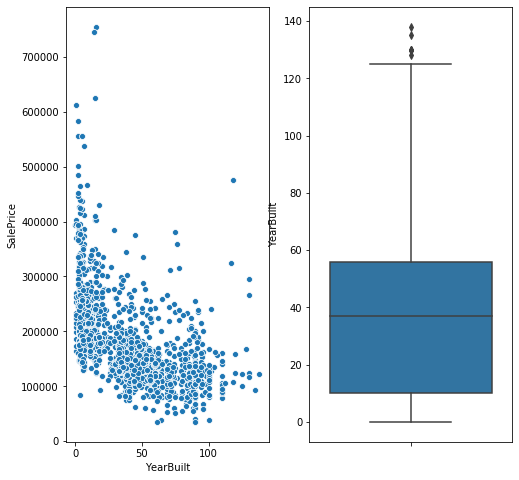

In [149]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['YearBuilt'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['YearBuilt'])
plt.show()

### just a little outliers so ignoring them

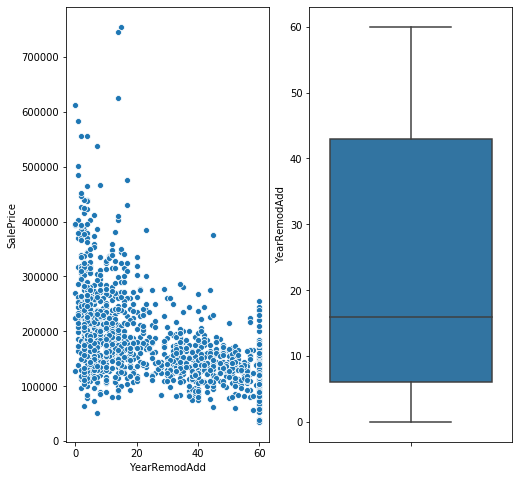

In [150]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['YearRemodAdd'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['YearRemodAdd'])
plt.show()

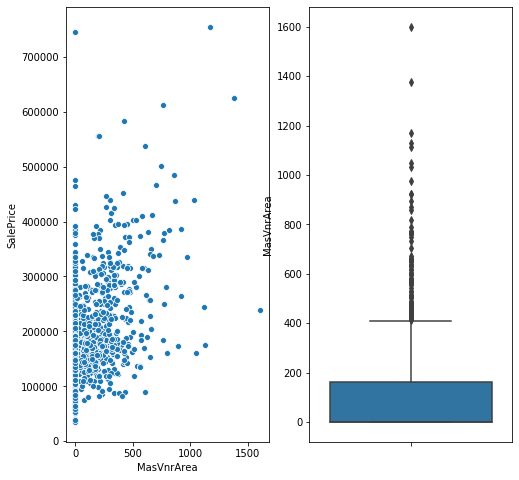

In [151]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['MasVnrArea'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['MasVnrArea'])
plt.show()

In [152]:
Q1 = surprise_Housing_df['MasVnrArea'].quantile(0.1)
Q3 = surprise_Housing_df['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['MasVnrArea'] >= Q3 + 3*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
297,60,FV,66.0,7399,Pave,IR1,Lvl,Inside,Gtl,Somerst,Norm,1Fam,2Story,7,5,13,12,Hip,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,13.0,RFn,2,576,TA,TA,Y,0,10,0,198,No Fence,None,0,6,3,WD,Normal,239000,12.384219,2.5,2925
1169,60,RL,118.0,35760,No alley access,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,1Fam,2Story,10,5,15,14,Hip,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,15.0,Fin,3,807,TA,TA,Y,361,76,0,0,No Fence,None,0,7,4,WD,Normal,625000,13.345507,4.5,5557


In [153]:
Q1 = surprise_Housing_df['MasVnrArea'].quantile(0.1)
Q3 = surprise_Housing_df['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df = surprise_Housing_df[(surprise_Housing_df['MasVnrArea'] >= Q1 - 3*IQR) & 
                      (surprise_Housing_df['MasVnrArea'] <= Q3 + 3*IQR)]

In [154]:
surprise_Housing_df.shape

(1451, 75)

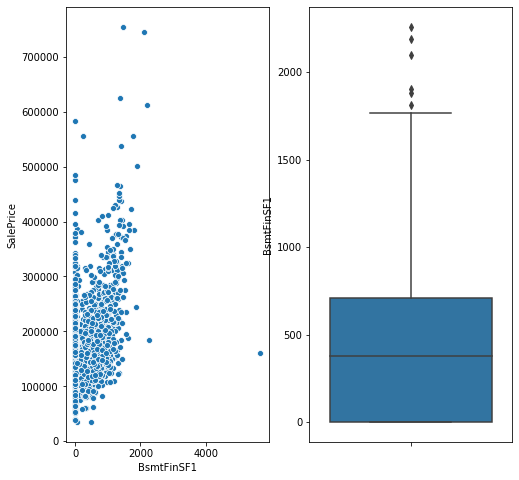

In [155]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['BsmtFinSF1'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['BsmtFinSF1'])
plt.show()

In [156]:
Q1 = surprise_Housing_df['BsmtFinSF1'].quantile(0.1)
Q3 = surprise_Housing_df['BsmtFinSF1'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['BsmtFinSF1'] >= Q3 + 1.5*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea


In [157]:
#### Since there were no outliers outside the 1.5*IQR range i am not dropping anthing from here.

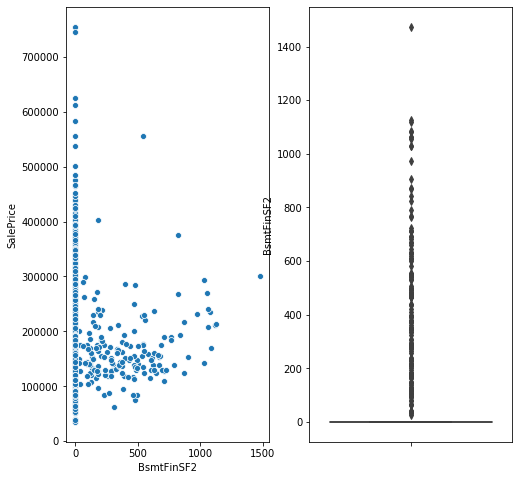

In [158]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['BsmtFinSF2'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['BsmtFinSF2'])
plt.show()

In [159]:
Q1 = surprise_Housing_df['BsmtFinSF2'].quantile(0.1)
Q3 = surprise_Housing_df['BsmtFinSF2'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['BsmtFinSF2'] >= Q3 + 9*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
322,60,RL,86.0,10380,No alley access,IR1,Lvl,Inside,Gtl,SawyerW,Norm,1Fam,2Story,7,5,24,23,Gable,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28,ALQ,1474,0,1502,GasA,Ex,Y,SBrkr,1553,1177,2730,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,23.0,Fin,2,576,TA,TA,Y,201,96,0,0,MnPrv,None,0,8,3,WD,Normal,301000,12.614866,3.5,4232


In [160]:
Q1 = surprise_Housing_df['BsmtFinSF2'].quantile(0.1)
Q3 = surprise_Housing_df['BsmtFinSF2'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df = surprise_Housing_df[(surprise_Housing_df['BsmtFinSF2'] >= Q1 - 9*IQR) & 
                      (surprise_Housing_df['BsmtFinSF2'] <= Q3 + 9*IQR)]

In [161]:
#### I am doing the outlier treeatment to only few records because I don't want to drastically reduce the training data set. I will run the models and see If I need to remove more records.

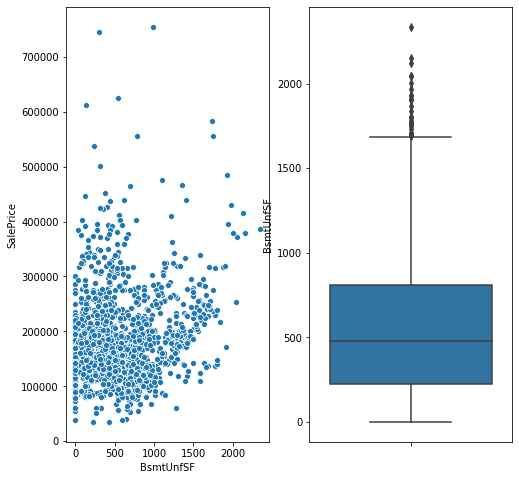

In [162]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['BsmtUnfSF'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['BsmtUnfSF'])
plt.show()

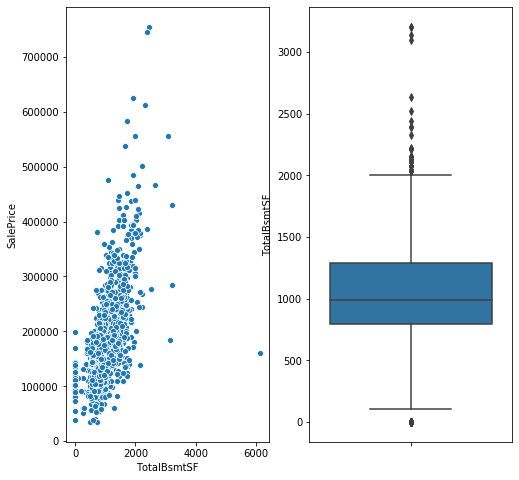

In [163]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['TotalBsmtSF'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['TotalBsmtSF'])
plt.show()

In [164]:
Q1 = surprise_Housing_df['TotalBsmtSF'].quantile(0.1)
Q3 = surprise_Housing_df['TotalBsmtSF'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['TotalBsmtSF'] >= Q3 + 2*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea


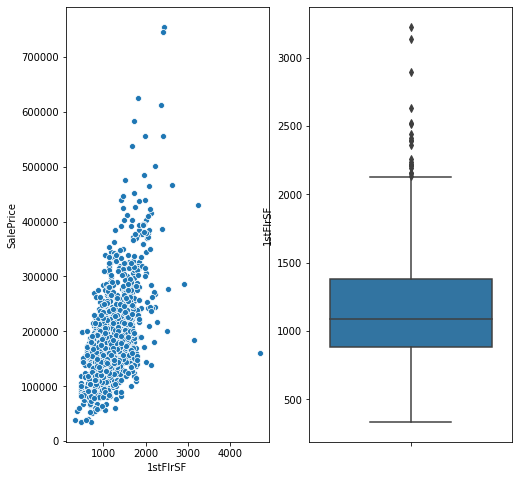

In [165]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['1stFlrSF'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['1stFlrSF'])
plt.show()

In [166]:
Q1 = surprise_Housing_df['1stFlrSF'].quantile(0.1)
Q3 = surprise_Housing_df['1stFlrSF'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['1stFlrSF'] >= Q3 + 1.5*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
496,20,RL,0.0,12692,No alley access,IR1,Lvl,Inside,Gtl,NoRidge,Norm,1Fam,1Story,8,5,18,17,Hip,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,Y,SBrkr,3228,0,3228,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,18.0,RFn,2,546,TA,TA,Y,264,75,291,0,No Fence,None,0,5,3,WD,Normal,430000,12.971540,4.0,6428
523,60,RL,130.0,40094,No alley access,IR1,Bnk,Inside,Gtl,Edwards,PosN,1Fam,2Story,10,5,3,2,Hip,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,3.0,Fin,3,884,TA,TA,Y,208,406,0,0,No Fence,None,0,10,3,New,Partial,184750,12.126759,4.5,7814


In [167]:
Q1 = surprise_Housing_df['1stFlrSF'].quantile(0.1)
Q3 = surprise_Housing_df['1stFlrSF'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df = surprise_Housing_df[(surprise_Housing_df['1stFlrSF'] >= Q1 - 1.5*IQR) & 
                      (surprise_Housing_df['1stFlrSF'] <= Q3 + 1.5*IQR)]

In [168]:
surprise_Housing_df.shape

(1448, 75)

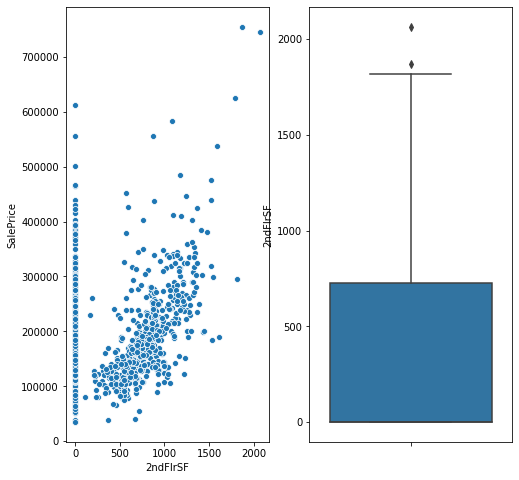

In [169]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['2ndFlrSF'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['2ndFlrSF'])
plt.show()

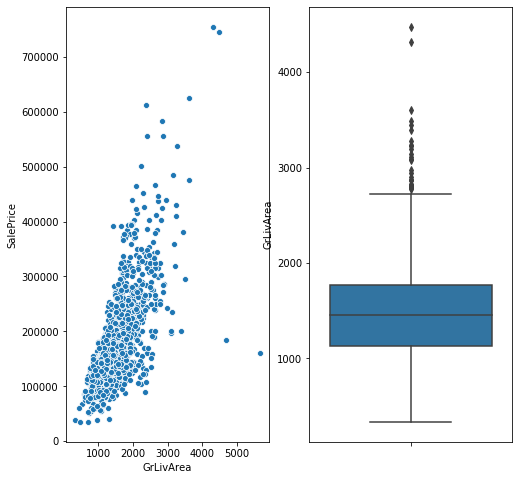

In [170]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['GrLivArea'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['GrLivArea'])
plt.show()

In [171]:
Q1 = surprise_Housing_df['GrLivArea'].quantile(0.1)
Q3 = surprise_Housing_df['GrLivArea'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['GrLivArea'] >= Q3 + 1.5*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
691,60,RL,104.0,21535,No alley access,IR1,Lvl,Corner,Gtl,NoRidge,Norm,1Fam,2Story,10,6,16,15,Gable,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,16.0,Fin,3,832,TA,TA,Y,382,50,0,0,No Fence,None,0,1,3,WD,Normal,755000,13.534473,4.0,6760
1182,60,RL,160.0,15623,No alley access,IR1,Lvl,Corner,Gtl,NoRidge,Norm,1Fam,2Story,10,5,14,14,Hip,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,14.0,Fin,3,813,TA,TA,Y,171,78,0,0,MnPrv,None,0,7,3,WD,Abnorml,745000,13.521139,4.5,6872


In [172]:
Q1 = surprise_Housing_df['GrLivArea'].quantile(0.1)
Q3 = surprise_Housing_df['GrLivArea'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df = surprise_Housing_df[(surprise_Housing_df['GrLivArea'] >= Q1 - 1.5*IQR) & 
                      (surprise_Housing_df['GrLivArea'] <= Q3 + 1.5*IQR)]

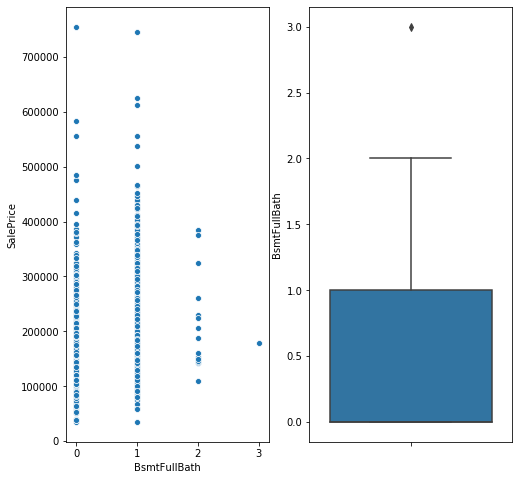

In [173]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['BsmtFullBath'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['BsmtFullBath'])
plt.show()

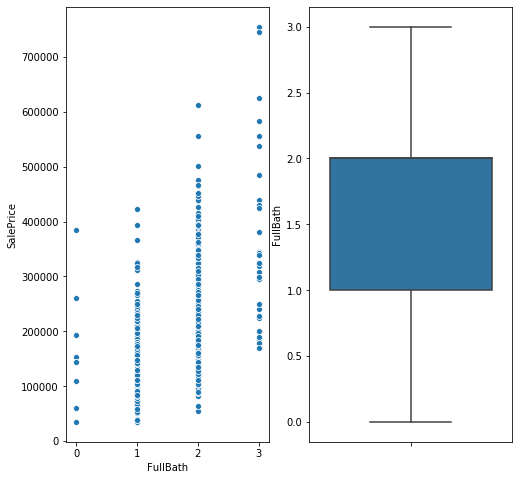

In [174]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['FullBath'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['FullBath'])
plt.show()

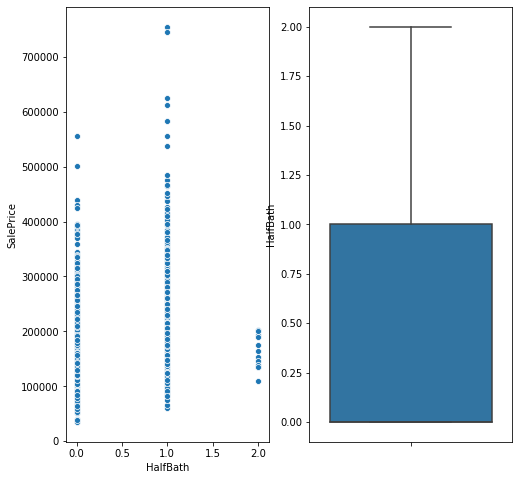

In [175]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['HalfBath'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['HalfBath'])
plt.show()

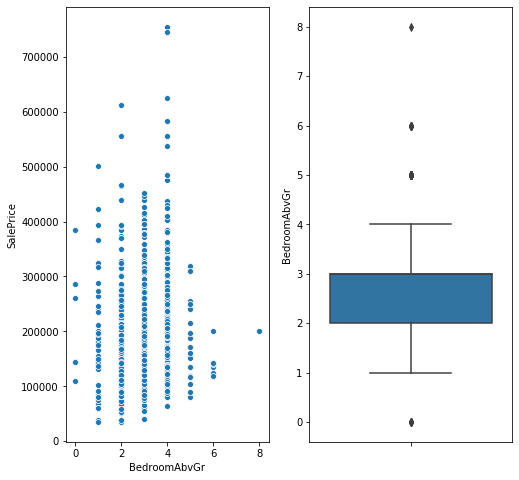

In [176]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['BedroomAbvGr'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['BedroomAbvGr'])
plt.show()

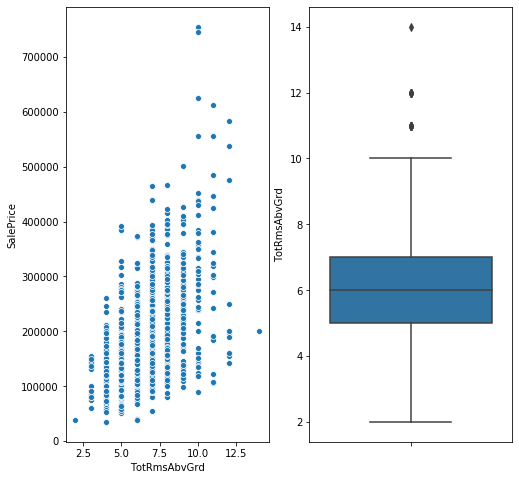

In [177]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['TotRmsAbvGrd'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['TotRmsAbvGrd'])
plt.show()

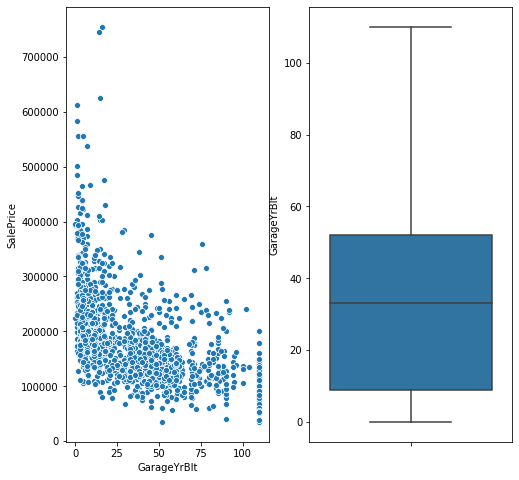

In [178]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['GarageYrBlt'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['GarageYrBlt'])
plt.show()

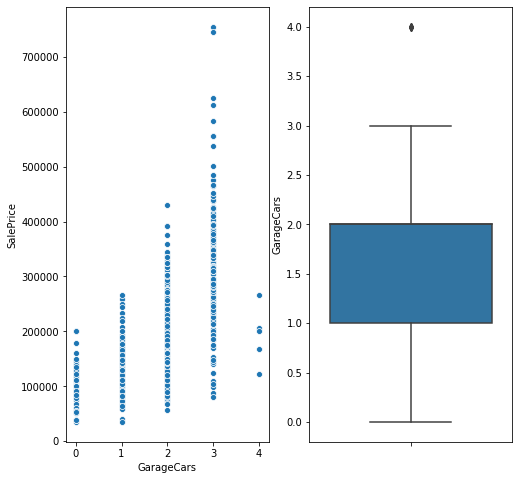

In [179]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['GarageCars'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['GarageCars'])
plt.show()

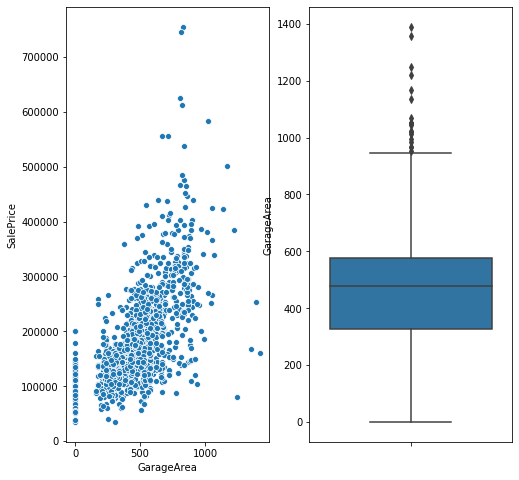

In [180]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['GarageArea'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['GarageArea'])
plt.show()

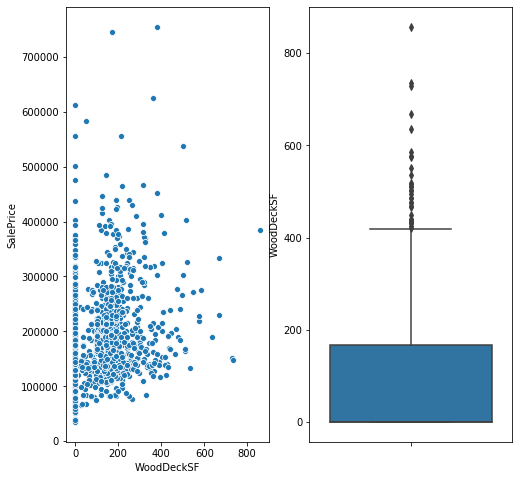

In [181]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['WoodDeckSF'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['WoodDeckSF'])
plt.show()

In [182]:
Q1 = surprise_Housing_df['WoodDeckSF'].quantile(0.1)
Q3 = surprise_Housing_df['WoodDeckSF'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df[surprise_Housing_df['WoodDeckSF'] >= Q3 + 2*IQR]

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
53,20,RL,68.0,50271,No alley access,IR1,Low,Inside,Gtl,Veenker,Norm,1Fam,1Story,9,5,29,23,Gable,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,29.0,Fin,3,894,TA,TA,Y,857,72,0,0,No Fence,None,0,11,4,WD,Normal,385000,12.860999,2.5,3684


In [183]:
Q1 = surprise_Housing_df['WoodDeckSF'].quantile(0.1)
Q3 = surprise_Housing_df['WoodDeckSF'].quantile(0.9)
IQR = Q3 - Q1
surprise_Housing_df = surprise_Housing_df[(surprise_Housing_df['WoodDeckSF'] >= Q1 - 2*IQR) & 
                      (surprise_Housing_df['WoodDeckSF'] <= Q3 + 2*IQR)]

In [184]:
surprise_Housing_df.shape

(1445, 75)

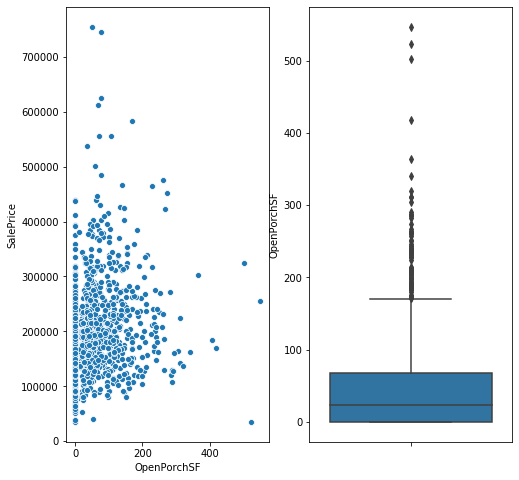

In [185]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['OpenPorchSF'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['OpenPorchSF'])
plt.show()

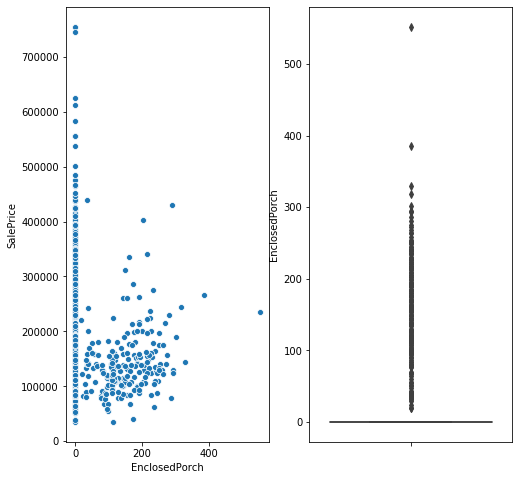

In [186]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['EnclosedPorch'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['EnclosedPorch'])
plt.show()

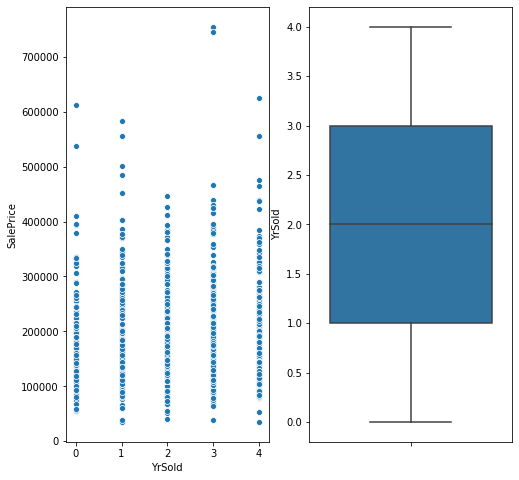

In [187]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['YrSold'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['YrSold'])
plt.show()

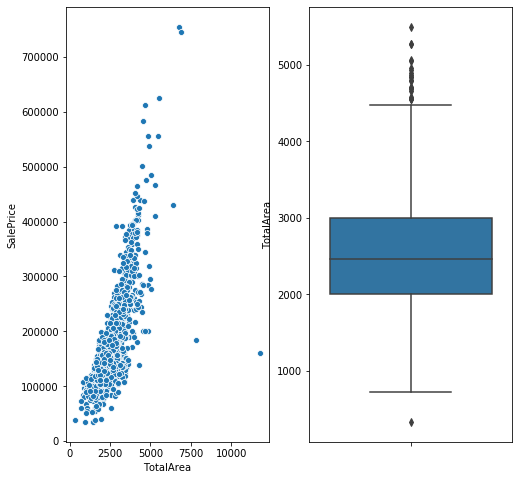

In [188]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.scatterplot(x = surprise_Housing_numeric_df['TotalArea'], y = surprise_Housing_numeric_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y =surprise_Housing_df['TotalArea'])
plt.show()

### Checking for the patterns in the categorical columns

In [189]:
surprise_Housing_categorical_df = surprise_Housing_df.select_dtypes(include = ['object'])
surprise_Housing_categorical_df.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Fence,None,2,WD,Normal
1,20,RL,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,5,WD,Normal
2,60,RL,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,9,WD,Normal
3,70,RL,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,None,2,WD,Abnorml
4,60,RL,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,12,WD,Normal


In [190]:
col_cate = surprise_Housing_categorical_df.columns
col_cate

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

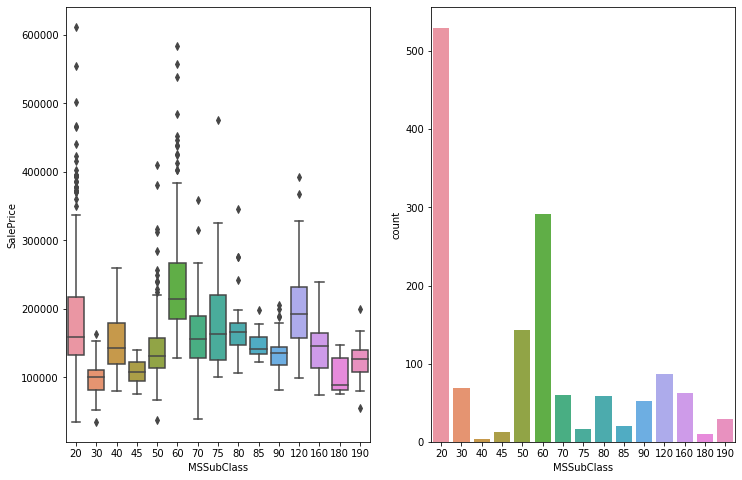

In [191]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['MSSubClass'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['MSSubClass'] )
plt.show()

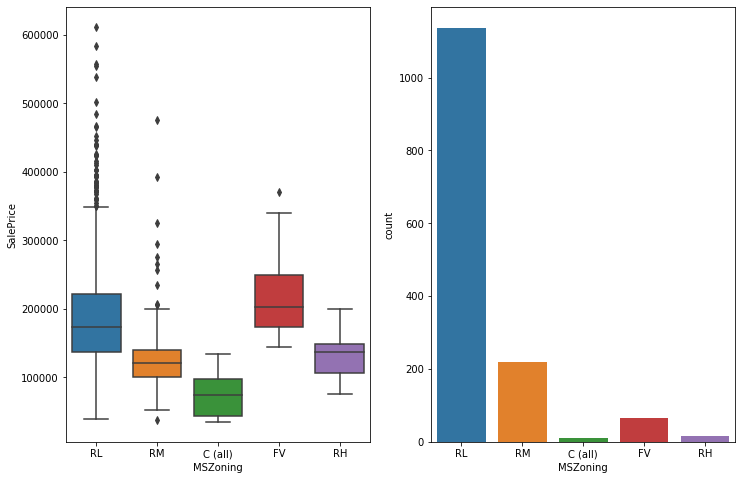

In [192]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['MSZoning'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['MSZoning'] )
plt.show()

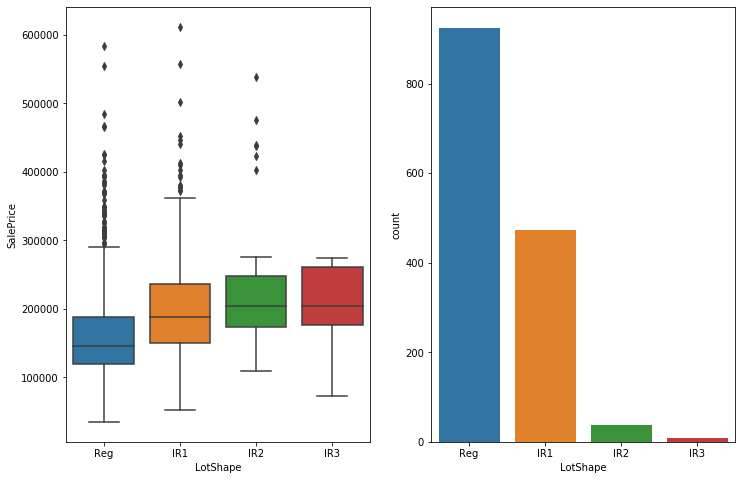

In [193]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['LotShape'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['LotShape'] )
plt.show()

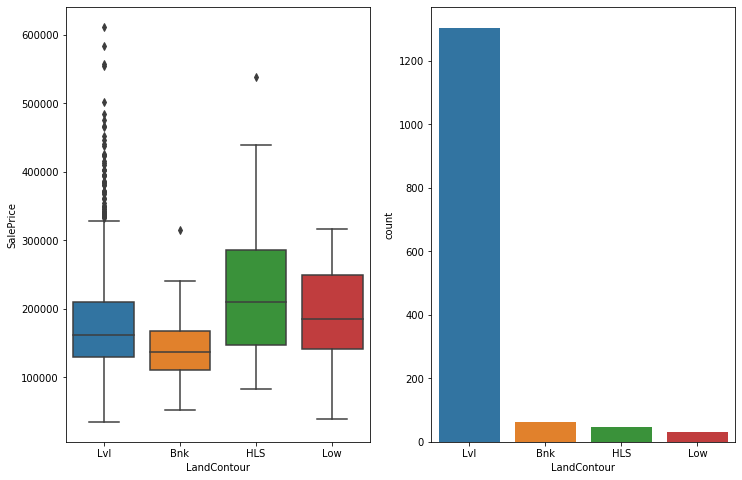

In [194]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['LandContour'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['LandContour'] )
plt.show()

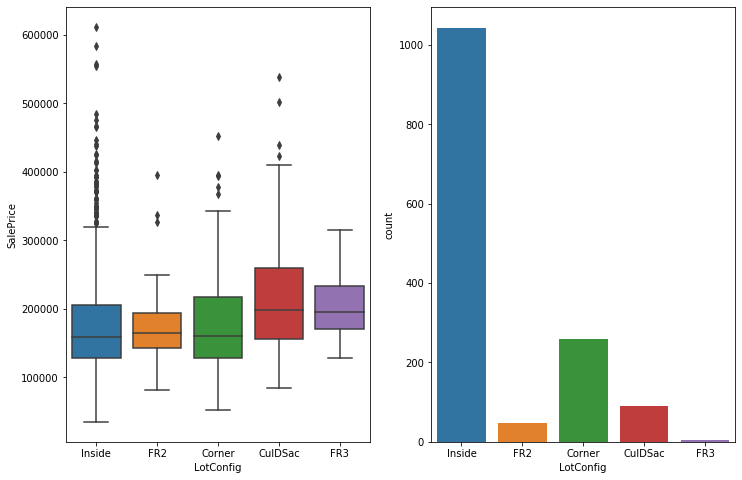

In [195]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['LotConfig'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['LotConfig'] )
plt.show()

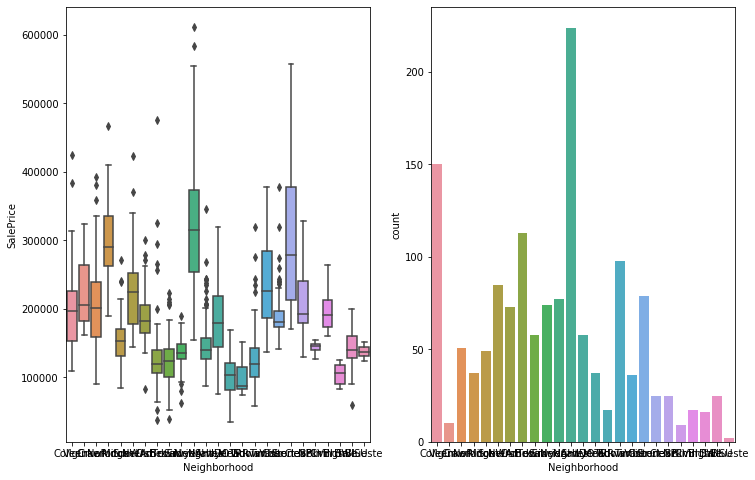

In [196]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['Neighborhood'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['Neighborhood'] )
plt.show()

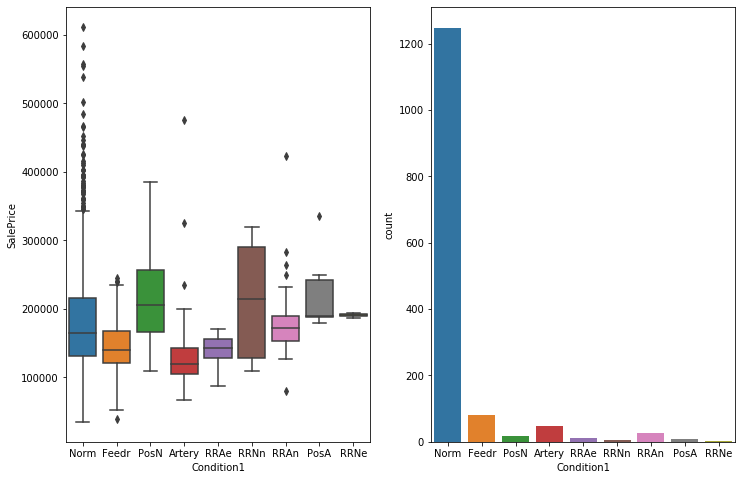

In [197]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['Condition1'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['Condition1'] )
plt.show()

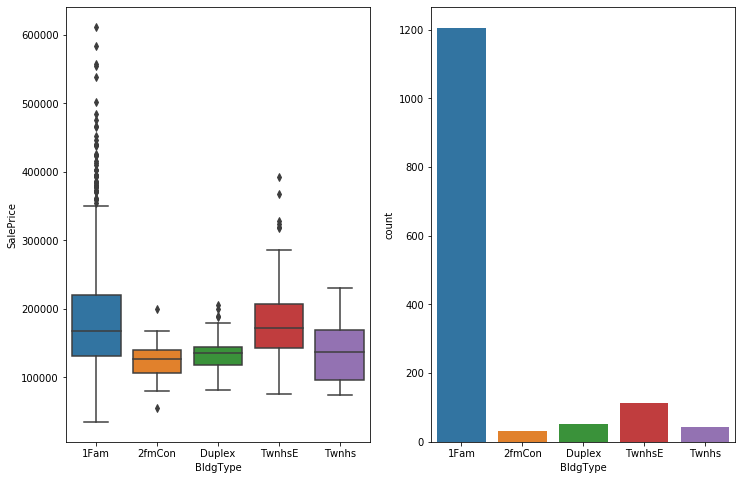

In [198]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['BldgType'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['BldgType'] )
plt.show()

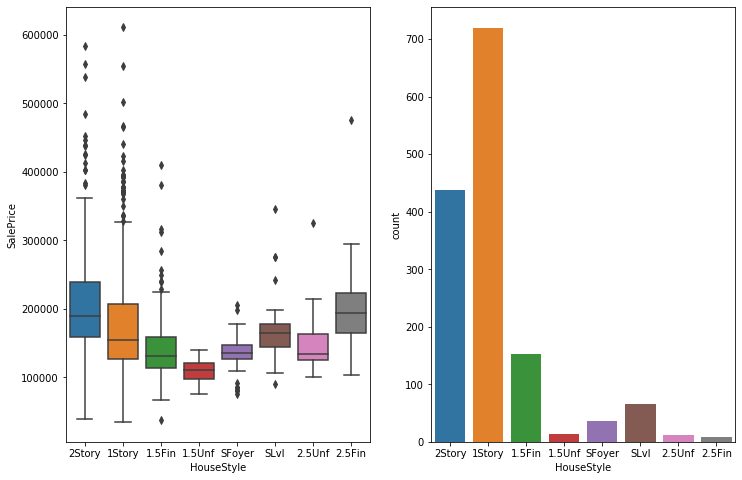

In [199]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['HouseStyle'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['HouseStyle'] )
plt.show()

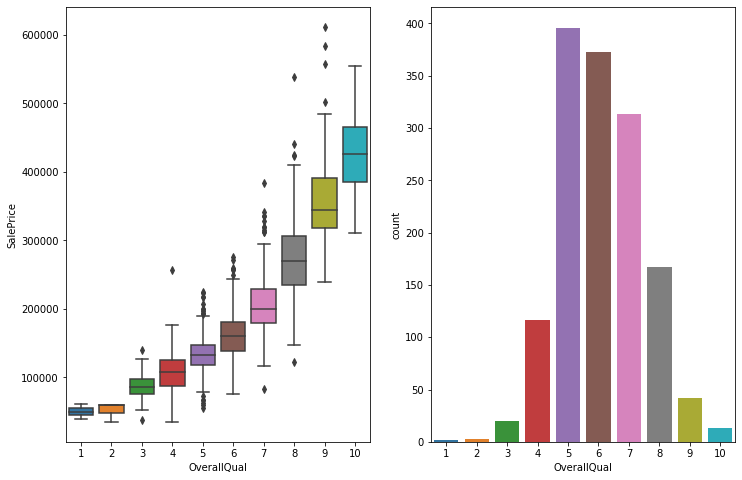

In [200]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['OverallQual'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['OverallQual'] )
plt.show()

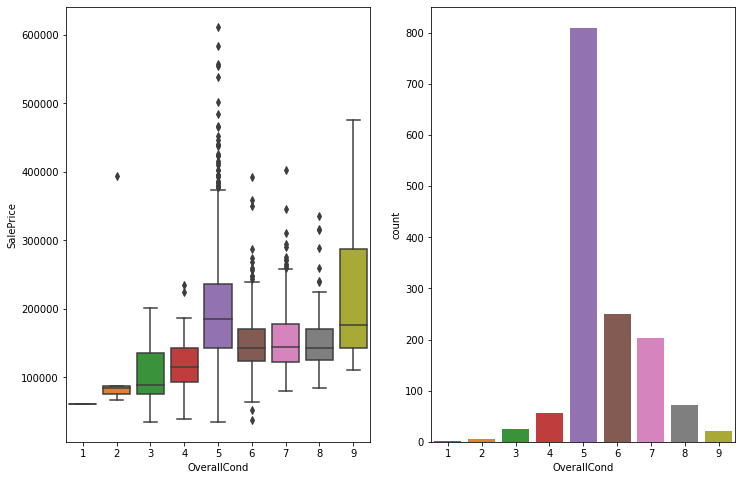

In [201]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['OverallCond'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['OverallCond'] )
plt.show()

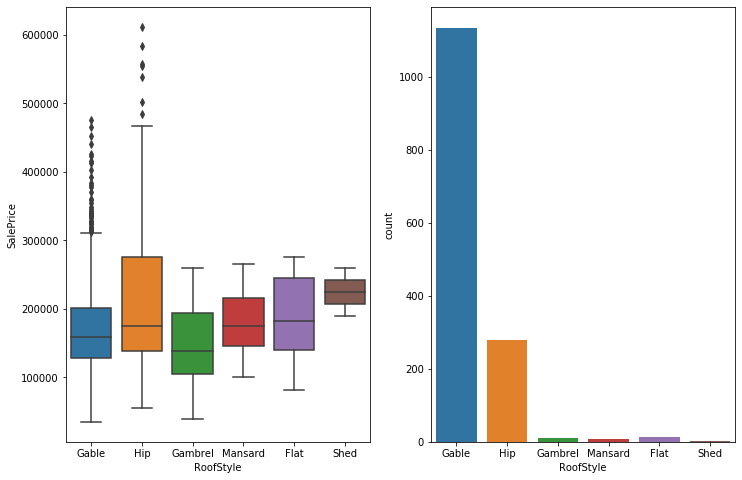

In [202]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['RoofStyle'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['RoofStyle'] )
plt.show()

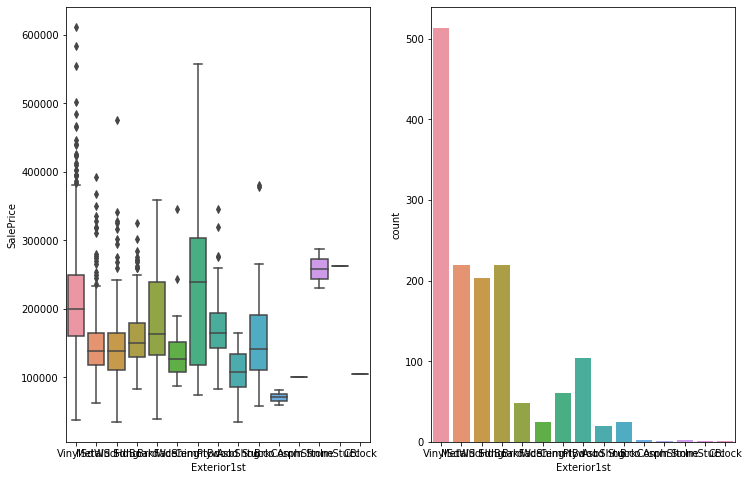

In [203]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['Exterior1st'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['Exterior1st'] )
plt.show()

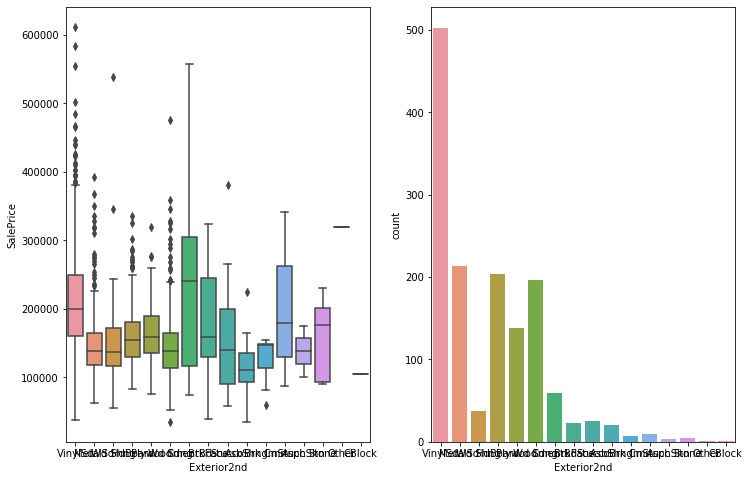

In [204]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['Exterior2nd'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['Exterior2nd'] )
plt.show()

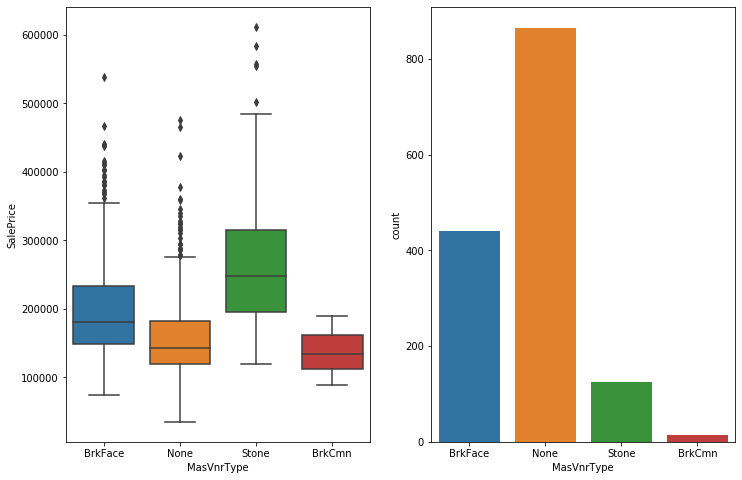

In [205]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['MasVnrType'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['MasVnrType'] )
plt.show()

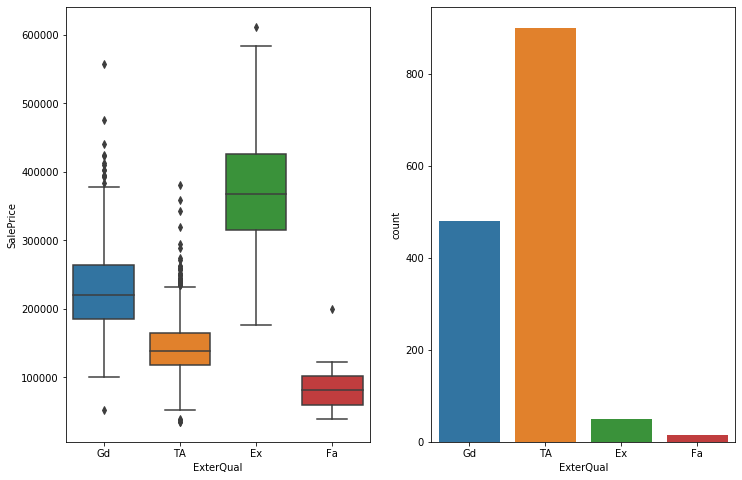

In [206]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['ExterQual'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['ExterQual'] )
plt.show()

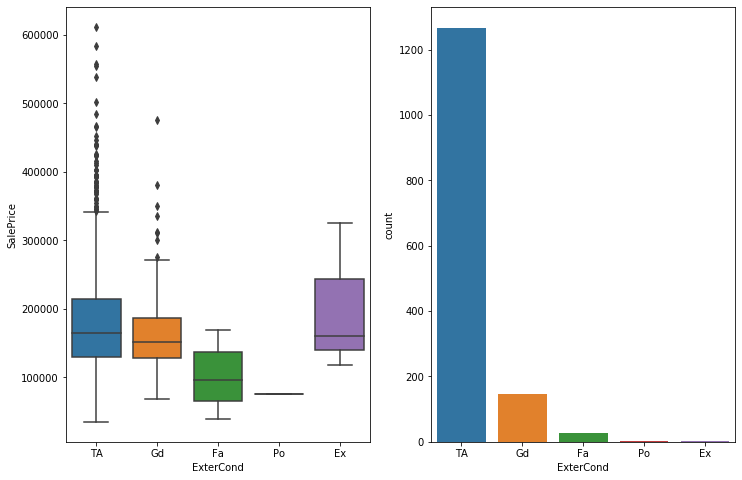

In [207]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['ExterCond'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['ExterCond'] )
plt.show()

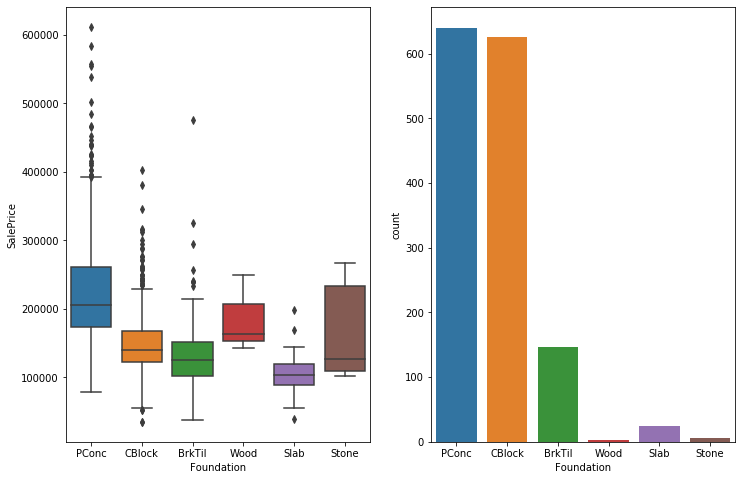

In [208]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['Foundation'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['Foundation'] )
plt.show()

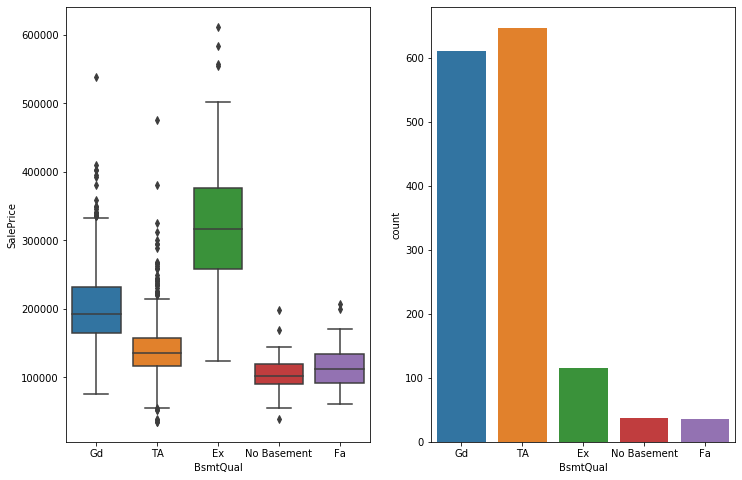

In [209]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['BsmtQual'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['BsmtQual'] )
plt.show()

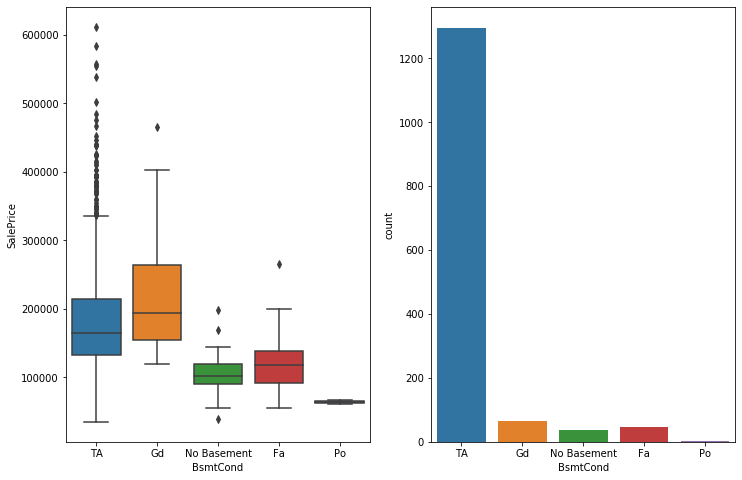

In [210]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['BsmtCond'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['BsmtCond'] )
plt.show()

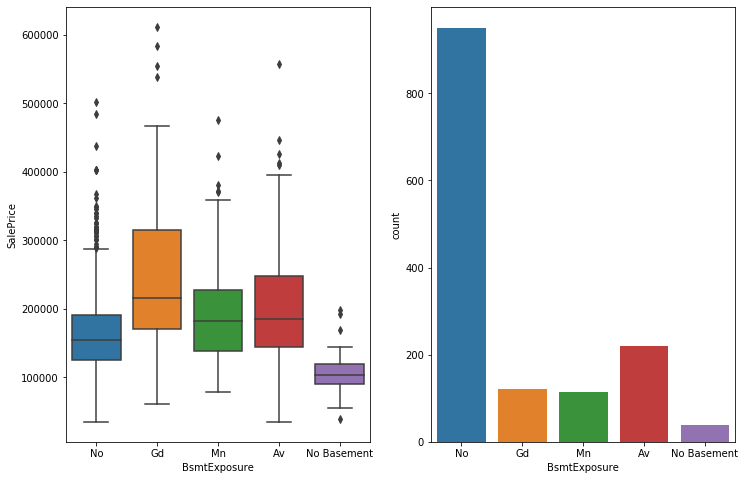

In [211]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['BsmtExposure'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['BsmtExposure'] )
plt.show()

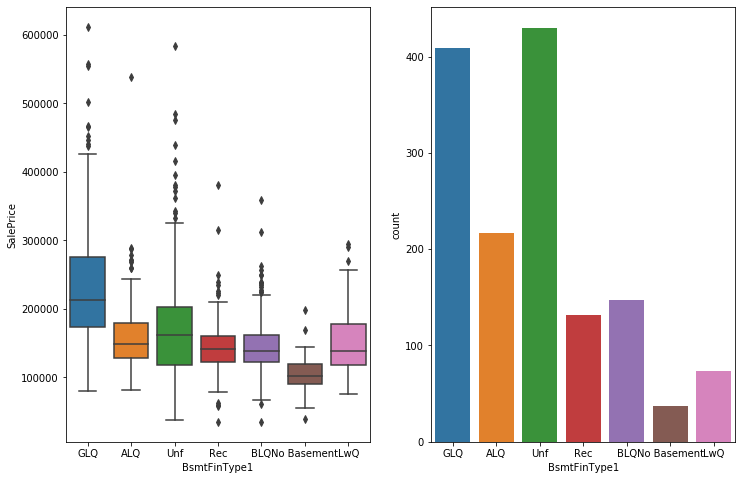

In [212]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['BsmtFinType1'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['BsmtFinType1'] )
plt.show()

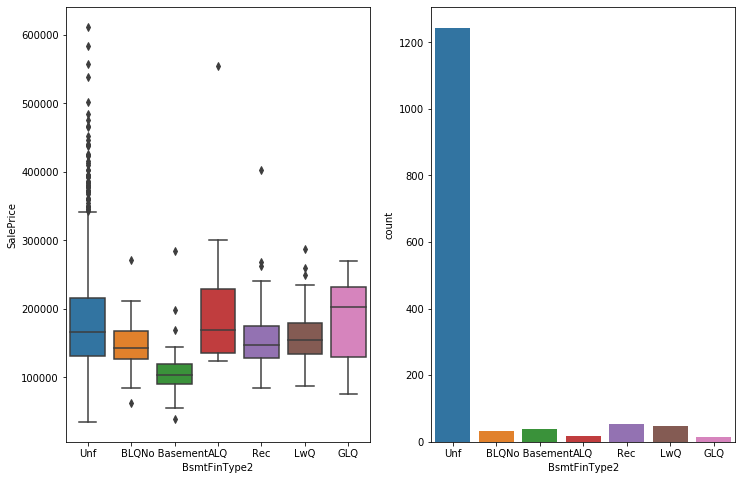

In [213]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['BsmtFinType2'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['BsmtFinType2'] )
plt.show()

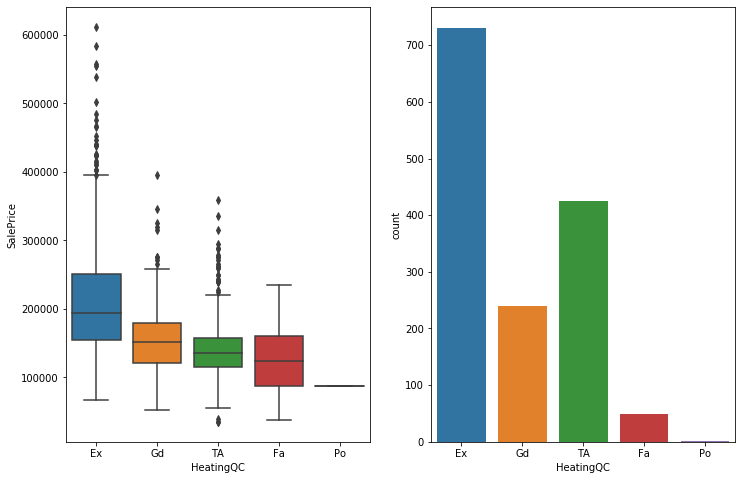

In [214]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['HeatingQC'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['HeatingQC'] )
plt.show()

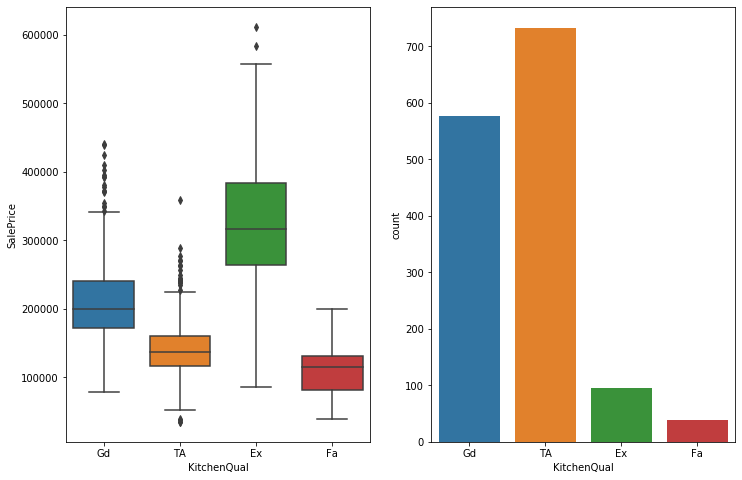

In [215]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['KitchenQual'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['KitchenQual'] )
plt.show()

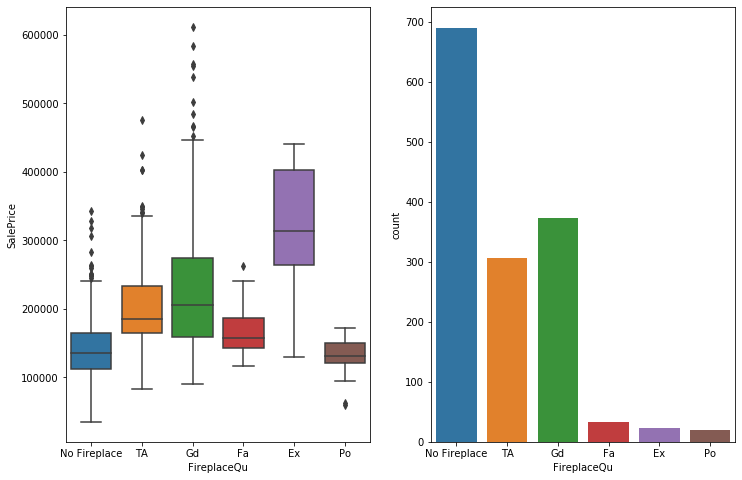

In [216]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['FireplaceQu'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['FireplaceQu'] )
plt.show()

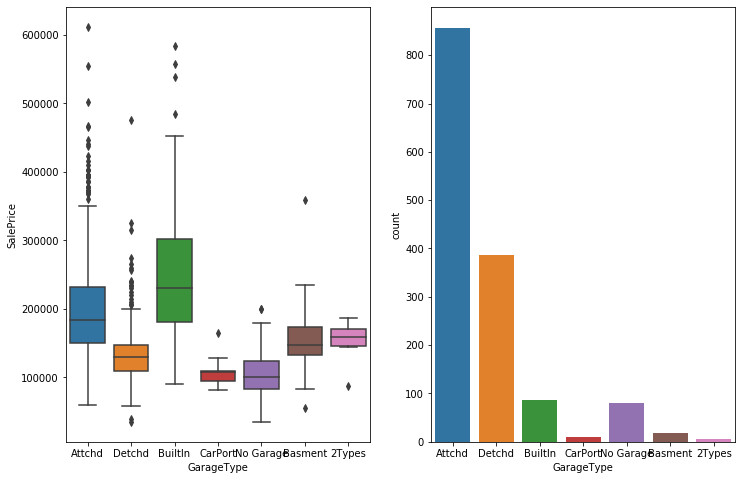

In [217]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['GarageType'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['GarageType'] )
plt.show()

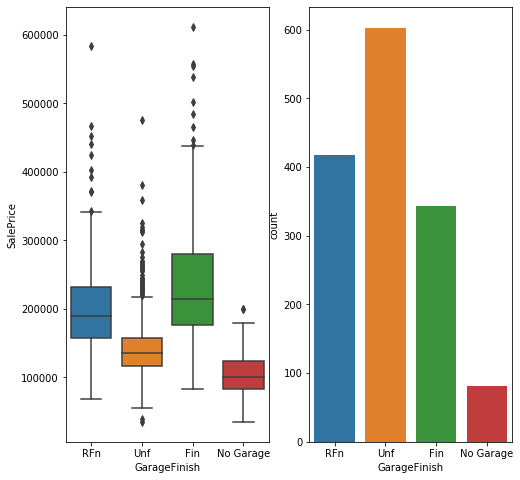

In [218]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['GarageFinish'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['GarageFinish'] )
plt.show()

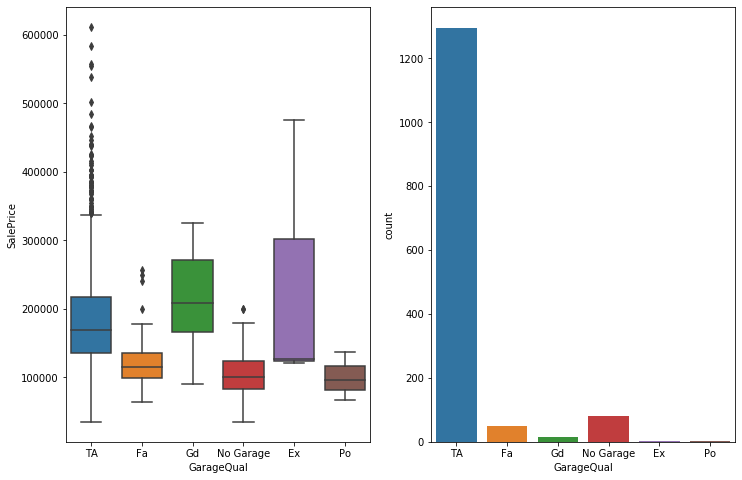

In [219]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['GarageQual'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['GarageQual'] )
plt.show()

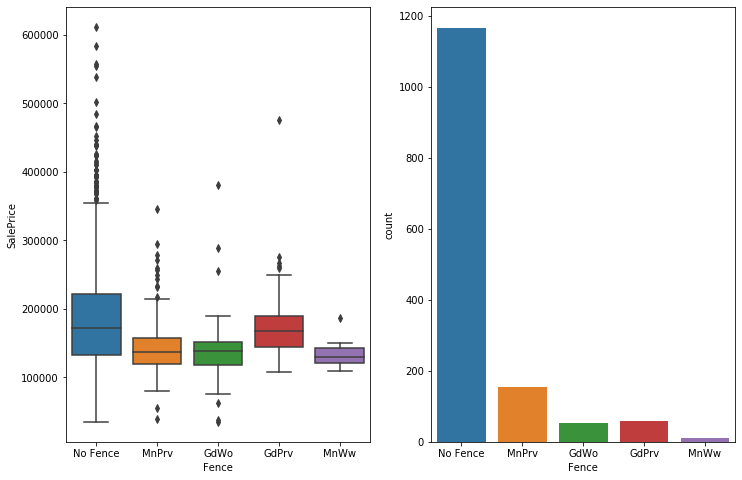

In [220]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['Fence'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['Fence'] )
plt.show()

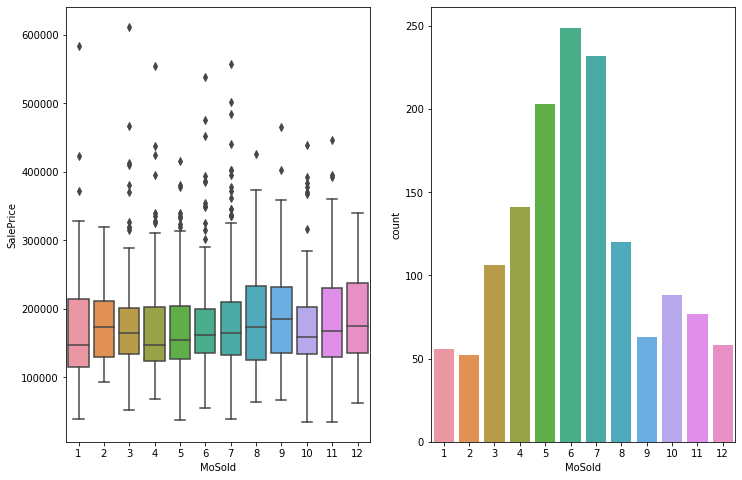

In [221]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['MoSold'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['MoSold'] )
plt.show()

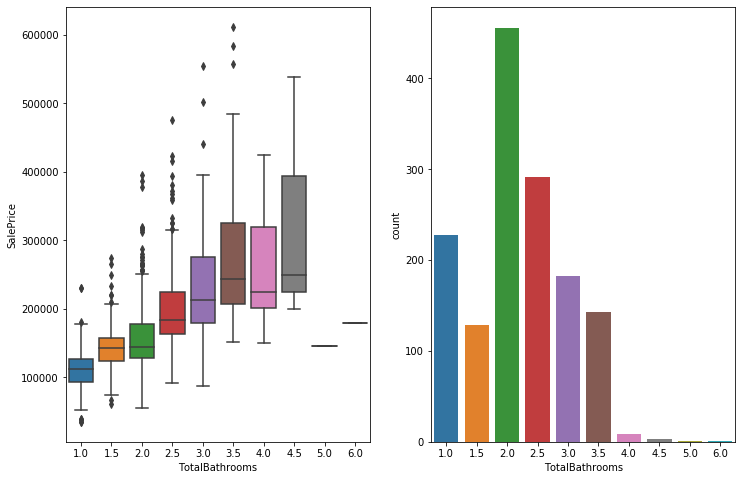

In [222]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x = surprise_Housing_df['TotalBathrooms'], y = surprise_Housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.countplot(x =surprise_Housing_df['TotalBathrooms'] )
plt.show()

#### We do see some clear patterns in the Categorical Data analysis as well , where features like Builtin Garages have higher median sale value than other types which is expected but none of the plots show any patterns where we should take any remedial actions , probably because we have already deleted few columns.

### Checking for Corelation

In [223]:
surprise_Housing_numeric_df.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
LotFrontage,1.000000,0.100739,-0.036853,-0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.221396,0.044018,-0.044851,0.165229,0.201473,-0.016780,0.069605,0.027366,0.022969,-0.059606,0.012094,0.209624,0.179303,0.083124,0.267509
LotArea,0.100739,1.000000,-0.014228,-0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024522,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160,0.038068,0.014261,0.263843,0.257320,0.204764,0.306814
YearBuilt,-0.036853,-0.014228,1.000000,0.592855,-0.311600,-0.249503,0.049107,-0.149040,-0.391452,-0.281986,-0.010308,-0.199010,-0.187599,0.038162,-0.468271,-0.242656,0.070651,0.174800,-0.095589,-0.147716,0.763228,-0.537850,-0.478954,-0.224880,-0.188686,0.387268,0.050364,0.034383,-0.013618,-0.522897,-0.586570,-0.524298,-0.335488
YearRemodAdd,-0.078686,-0.013788,0.592855,1.000000,-0.176529,-0.128451,0.067759,-0.181133,-0.291066,-0.240379,-0.140024,-0.287389,-0.119470,0.012337,-0.439046,-0.183331,0.040581,0.149598,-0.191740,-0.112581,0.562938,-0.420622,-0.371600,-0.205726,-0.226298,0.193919,0.038740,0.010286,0.035743,-0.507101,-0.565608,-0.443719,-0.338404
MasVnrArea,0.105010,0.103321,-0.311600,-0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,-0.268875,0.361945,0.370884,0.159991,0.122528,-0.109907,0.062248,-0.029512,0.008317,0.472614,0.426775,0.314248,0.439385
BsmtFinSF1,0.076670,0.214103,-0.249503,-0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,-0.185098,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021,0.003571,-0.014359,0.386420,0.372023,0.481609,0.411084
BsmtFinSF2,-0.009312,0.111170,0.049107,0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.045903,-0.038264,-0.018227,0.067898,0.003093,0.036543,0.088871,0.004940,-0.031706,-0.011378,0.004832,0.051709,0.049678
BsmtUnfSF,0.160829,-0.002618,-0.149040,-0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,-0.168676,0.214175,0.183303,-0.005316,0.129005,-0.002538,-0.012579,-0.023837,0.041258,0.214479,0.221985,-0.104496,0.374540
TotalBsmtSF,0.238274,0.260833,-0.391452,-0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,-0.345448,0.434585,0.486665,0.232019,0.247264,-0.095478,0.084489,-0.018479,0.014969,0.613581,0.612134,0.414468,0.822888
1stFlrSF,0.245181,0.299475,-0.281986,-0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,-0.274616,0.439317,0.489782,0.235459,0.211671,-0.065292,0.088758,-0.021096,0.013604,0.605852,0.596981,0.390557,0.797678


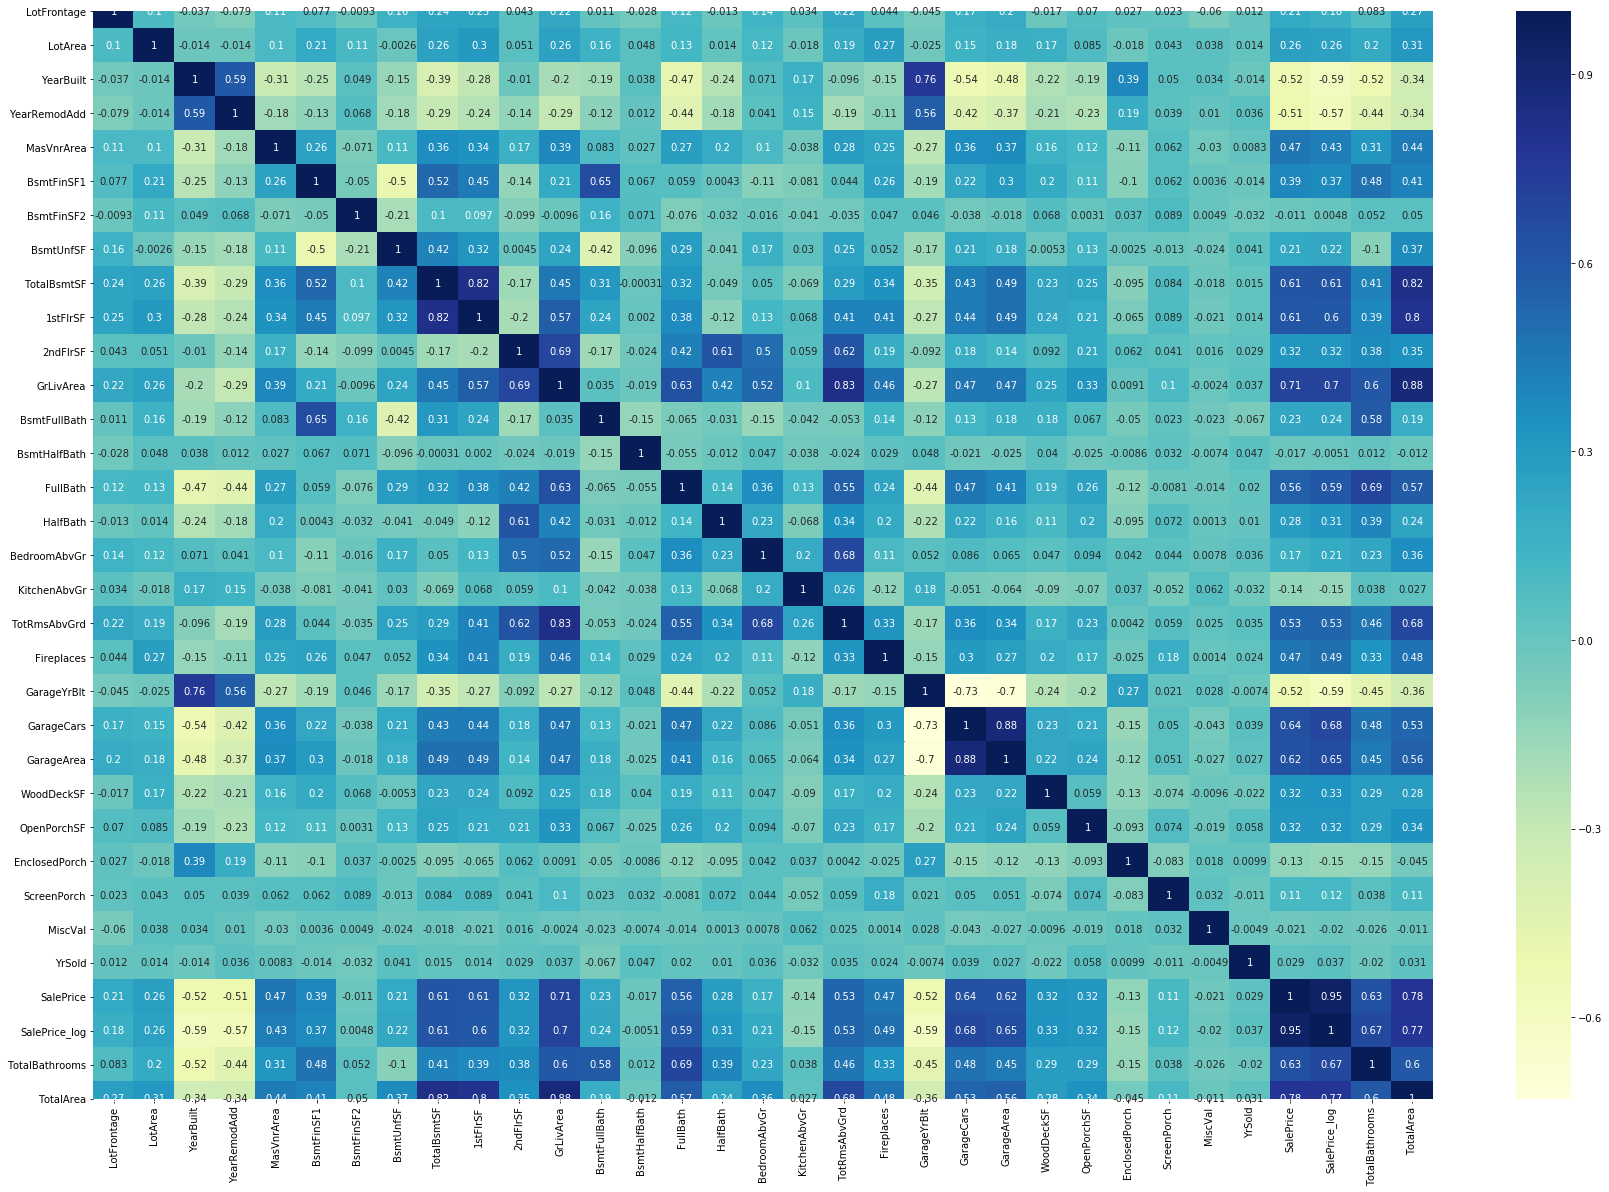

In [224]:
plt.figure(figsize = (30,20))
sns.heatmap(surprise_Housing_numeric_df.corr(),cmap="YlGnBu",annot = True)
plt.show()

#### We see some highly correlation to Sale price to columns like Area(TotalArea, GrLivArea) to the SalePrice. The individual columns also show some correaltion to them like GarageCars and GarageArea but we are hoping to tkae care of all the correlation in the model we are not doing any column relation before the model 

#### We can change some categorical variables data as there is better description in the data dictionary and MonthsSold can be also better represented

In [225]:
surprise_Housing_df['MSSubClass'].unique()

array([60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40],
      dtype=object)

In [226]:
dict_MSSubClass = {60:'2-STORY 1946 & NEWER',20:'1-STORY 1946 & NEWER ALL STYLES',70:'2-STORY 1945 & OLDER',
                  50:'1-1/2 STORY FINISHED ALL AGES',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES',
                   45:'1-1/2 STORY - UNFINISHED ALL AGES',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
                   ,30:'1-STORY 1945 & OLDER',85:'SPLIT FOYER',80:'SPLIT OR MULTI-LEVEL',160:'2-STORY PUD - 1946 & NEWER',75:'2-1/2 STORY ALL AGES'
                  ,180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',40:'1-STORY W/FINISHED ATTIC ALL AGES'}

In [227]:
surprise_Housing_df['MSSubClass'] = surprise_Housing_df['MSSubClass'].map(dict_MSSubClass)

In [228]:
surprise_Housing_df['MSSubClass'].unique()

array(['2-STORY 1946 & NEWER', '1-STORY 1946 & NEWER ALL STYLES',
       '2-STORY 1945 & OLDER', '1-1/2 STORY FINISHED ALL AGES',
       '2 FAMILY CONVERSION - ALL STYLES AND AGES',
       '1-1/2 STORY - UNFINISHED ALL AGES',
       'DUPLEX - ALL STYLES AND AGES',
       '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '1-STORY 1945 & OLDER', 'SPLIT FOYER', 'SPLIT OR MULTI-LEVEL',
       '2-STORY PUD - 1946 & NEWER', '2-1/2 STORY ALL AGES',
       'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       '1-STORY W/FINISHED ATTIC ALL AGES'], dtype=object)

#### I could have substituted for OverAllCond and OverAllQual and Mosold, But I am not modifying them because we can get reasonable understanding just by looking at them,even after converting to dummies.

### Data preparation

In [229]:
surprise_Housing_categorical_df.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,60,RL,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Fence,None,2,WD,Normal
1,20,RL,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,5,WD,Normal
2,60,RL,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,9,WD,Normal
3,70,RL,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,None,2,WD,Abnorml
4,60,RL,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,None,12,WD,Normal


#### Convert categorical into dummies

In [230]:

surprise_dummies = pd.get_dummies(surprise_Housing_categorical_df,drop_first =True)
surprise_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,...,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [231]:
surprise_Housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,TotalBathrooms,TotalArea
0,2-STORY 1946 & NEWER,RL,65.0,8450,No alley access,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,7,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,7.0,RFn,2,548,TA,TA,Y,0,61,0,0,No Fence,None,0,2,2,WD,Normal,208500,12.247694,3.5,2566
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,No alley access,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,34,34,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,34.0,RFn,2,460,TA,TA,Y,298,0,0,0,No Fence,None,0,5,3,WD,Normal,181500,12.109011,2.5,2524
2,2-STORY 1946 & NEWER,RL,68.0,11250,No alley access,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,9,8,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,9.0,RFn,2,608,TA,TA,Y,0,42,0,0,No Fence,None,0,9,2,WD,Normal,223500,12.317167,3.5,2706
3,2-STORY 1945 & OLDER,RL,60.0,9550,No alley access,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,95,40,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,12.0,Unf,3,642,TA,TA,Y,0,35,272,0,No Fence,None,0,2,4,WD,Abnorml,140000,11.849398,2.0,2473
4,2-STORY 1946 & NEWER,RL,84.0,14260,No alley access,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,10,10,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,10.0,RFn,3,836,TA,TA,Y,192,84,0,0,No Fence,None,0,12,2,WD,Normal,250000,12.429216,3.5,3343


In [232]:
surprise_Housing_df.drop('SalePrice' ,axis = 1 , inplace = True )

In [233]:
surprise_Housing_df.shape

(1445, 74)

In [234]:
surprise_Housing_categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [235]:
surprise_dummies.shape

(1445, 246)

In [236]:
surprise_Housing_df.drop(list(surprise_Housing_categorical_df.columns) ,axis = 1, inplace = True)

In [237]:
surprise_Housing_df.shape

(1445, 32)

In [238]:
surprise_Housing_df = pd.concat([surprise_Housing_df,surprise_dummies],axis =1)

In [239]:
surprise_Housing_df.shape

(1445, 278)

In [240]:
Y = surprise_Housing_df.pop('SalePrice_log')
X = surprise_Housing_df

In [241]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,YrSold,TotalBathrooms,TotalArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No alley access,...,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,7,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,7.0,2,548,0,61,0,0,0,2,3.5,2566,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,34,34,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,34.0,2,460,298,0,0,0,0,3,2.5,2524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,9,8,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,9.0,2,608,0,42,0,0,0,2,3.5,2706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,95,40,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,12.0,3,642,0,35,272,0,0,4,2.0,2473,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,10,10,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,10.0,3,836,192,84,0,0,0,2,3.5,3343,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [242]:
X.shape

(1445, 277)

In [243]:
Y.shape

(1445,)

In [244]:
#### scale the features

cols  = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=277)

In [245]:
## Split into test and train
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state = 100)

### Model Building and Evaluation

#### Ridge

In [246]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross Validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid =params,
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score = True,
                       verbose = 1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [247]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]

In [248]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010770,5.622039e-03,0.000997,3.814697e-07,0.0001,{'alpha': 0.0001},-0.087195,-0.088547,-0.099024,-0.101157,-0.106645,-0.096504,0.007496,28,-0.055972,-0.057767,-0.054180,-0.055145,-0.054714,-0.055556,0.001252
1,0.008378,7.972848e-04,0.001197,3.980410e-04,0.001,{'alpha': 0.001},-0.087181,-0.088546,-0.099005,-0.101149,-0.106383,-0.096443,0.007427,27,-0.055974,-0.057767,-0.054182,-0.055145,-0.054714,-0.055556,0.001251
2,0.008380,1.197742e-03,0.001194,4.014298e-04,0.01,{'alpha': 0.01},-0.087048,-0.088526,-0.098814,-0.101067,-0.104205,-0.095923,0.006885,26,-0.055985,-0.057767,-0.054203,-0.055146,-0.054723,-0.055565,0.001246
3,0.007780,9.772146e-04,0.001197,3.989221e-04,0.05,{'alpha': 0.05},-0.086530,-0.088443,-0.098228,-0.100726,-0.099271,-0.094632,0.005928,25,-0.056051,-0.057766,-0.054285,-0.055153,-0.054812,-0.055613,0.001220
4,0.008377,7.972241e-04,0.001596,4.886946e-04,0.1,{'alpha': 0.1},-0.086024,-0.088344,-0.097677,-0.100346,-0.097000,-0.093871,0.005630,24,-0.056127,-0.057765,-0.054372,-0.055165,-0.054879,-0.055662,0.001197
5,0.008581,1.348585e-03,0.001193,4.006304e-04,0.2,{'alpha': 0.2},-0.085297,-0.088155,-0.096894,-0.099862,-0.095317,-0.093097,0.005487,23,-0.056253,-0.057766,-0.054516,-0.055186,-0.054971,-0.055738,0.001163
6,0.006982,2.780415e-07,0.000997,3.015783e-07,0.3,{'alpha': 0.3},-0.084777,-0.087980,-0.096349,-0.099748,-0.094841,-0.092731,0.005528,22,-0.056350,-0.057770,-0.054635,-0.055208,-0.055035,-0.055800,0.001138
7,0.008976,8.919101e-04,0.000998,5.955694e-07,0.4,{'alpha': 0.4},-0.084377,-0.087821,-0.095942,-0.099647,-0.094667,-0.092483,0.005580,21,-0.056428,-0.057778,-0.054735,-0.055232,-0.055093,-0.055853,0.001118
8,0.008783,1.824383e-03,0.001191,7.450748e-04,0.5,{'alpha': 0.5},-0.084077,-0.087667,-0.095768,-0.099552,-0.094824,-0.092369,0.005661,20,-0.056492,-0.057786,-0.054819,-0.055260,-0.055146,-0.055901,0.001100
9,0.007779,9.771748e-04,0.001197,3.987551e-04,0.6,{'alpha': 0.6},-0.083829,-0.087518,-0.095857,-0.099466,-0.094930,-0.092311,0.005757,19,-0.056547,-0.057795,-0.054890,-0.055302,-0.055192,-0.055945,0.001084


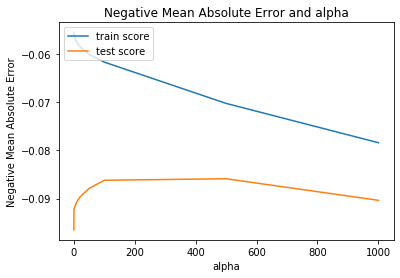

In [249]:
# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


#plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [250]:
alpha = 400
ridge = Ridge(alpha = alpha)

ridge.fit(X_train,y_train)
ridge.coef_

array([ 3.32822577e-03,  1.53367408e-02, -1.35406618e-02, -1.94263843e-02,
        9.21732734e-03,  1.72986601e-02, -5.34759431e-04,  1.72621282e-03,
        1.98540299e-02,  2.64060048e-02,  1.31712475e-02,  3.12445414e-02,
        5.69713303e-03,  7.65358589e-04,  1.25809753e-02,  1.15274041e-02,
        2.46775321e-03, -8.22330402e-03,  1.83619563e-02,  1.14316072e-02,
       -6.23821357e-03,  1.53392002e-02,  1.74981614e-02,  8.24336084e-03,
        6.42075690e-03,  5.82187280e-03,  1.15220123e-02,  2.13956623e-03,
        3.07418284e-03,  1.65157228e-02,  3.13134786e-02, -9.80123547e-03,
       -3.53921683e-04,  1.43953852e-03,  9.75219895e-04,  6.22226891e-03,
        7.27323207e-03,  1.33435506e-03, -5.82188463e-04,  1.28068855e-04,
       -1.62627060e-03, -5.36668916e-04, -8.16233106e-03, -3.44741485e-03,
       -2.11034047e-03,  6.69834820e-03,  1.65189649e-03,  9.62819637e-03,
       -2.45150682e-03,  2.88771898e-03,  6.71119812e-03,  3.37727375e-03,
       -5.25508251e-04, -

#### Checking the score

In [251]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.938887048111774


In [252]:
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9024134887894136


##### Validated the scores for the range from 1 to 800 , they all were relatively similar not too much variations as is visible from graph too Best one being at 400 as the difference between the test and train score was less than 5% and comparatively less than the other values and also the value of test score was highest.

#### Getting the column List

In [253]:
coefficeints = pd.Series(ridge.coef_ , index  = X_train.columns)

In [254]:
coefficeints[coefficeints == 0]

SaleType_Con    0.0
dtype: float64

In [255]:
coefficeints[coefficeints != 0].count()

276

In [256]:
Top_predictors = pd.concat([coefficeints.sort_values().head(10), coefficeints.sort_values().tail(10)])
Top_predictors.sort_values(ascending  =False)

TotalArea               0.031313
GrLivArea               0.031245
1stFlrSF                0.026406
OverallQual_9           0.020641
TotalBsmtSF             0.019854
OverallQual_8           0.019817
TotRmsAbvGrd            0.018362
GarageArea              0.017498
Neighborhood_Crawfor    0.017361
BsmtFinSF1              0.017299
BsmtQual_TA            -0.011445
OverallQual_4          -0.011496
KitchenQual_TA         -0.011816
Neighborhood_MeadowV   -0.011994
Neighborhood_IDOTRR    -0.012273
YearBuilt              -0.013541
OverallCond_4          -0.014059
OverallQual_3          -0.014599
OverallCond_3          -0.018683
YearRemodAdd           -0.019426
dtype: float64

### Model Interpretation

#### Now we can comment on the best predictors for this model.
    Looking at the top columns it confirms our existing expectations that Area columns(high values for TotalArea, GrLivArea,1stFlrSF,TotalBsmtSF, GarageArea) have poistive impacts on the pricing. The Age of the house built or remodelled will negatively impact the pricing (we had normalized the date columns) also Few neighbourhood also show their affect on the pricing Crawford has positive impact (assuming it's a high net worth area) and neighbourhood like Meadow Village and Iowa Dot and Rail Road have negative impact. 
    
    Based on this model we can aim for a house with all the bells and whistles , recently built or remodelled , bigger Area(Overall as well as in the 1stFloor, GarageArea, TotalRooms Above Grade ) and in a Good Neighbourhood (Crawford) and it will fetch a good price.

#### LASSO

#### I have changed the param list multiple time , while for values tilll 1000 the graph was showing a L shape so opting only for low values

In [257]:
# list of alphas to tune
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [258]:
lasso = Lasso()

## Cross validation
model_cv  = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score =True,
                       verbose =1 )

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [259]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158478,0.017274,0.000998,9.584308e-07,0.0001,{'alpha': 0.0001},-0.082030,-0.086334,-0.094491,-0.095718,-0.093532,-0.090413,0.005322,3,-0.057226,-0.058015,-0.055478,-0.056074,-0.055905,-0.056539,0.000938
1,0.050064,0.005997,0.001198,3.991619e-04,0.001,{'alpha': 0.001},-0.076807,-0.078207,-0.092599,-0.090581,-0.086236,-0.084878,0.006383,1,-0.062086,-0.061525,-0.060032,-0.061408,-0.060522,-0.061115,0.000738
2,0.014561,0.001494,0.001197,3.991606e-04,0.01,{'alpha': 0.01},-0.081353,-0.083279,-0.098004,-0.088289,-0.087044,-0.087588,0.005775,2,-0.081698,-0.080922,-0.077311,-0.077846,-0.079667,-0.079489,0.001697
3,0.010571,0.001016,0.001396,4.884807e-04,0.05,{'alpha': 0.05},-0.116779,-0.112112,-0.137892,-0.126843,-0.122516,-0.123222,0.008872,4,-0.122056,-0.122752,-0.117472,-0.119551,-0.122834,-0.120933,0.002101
4,0.009176,0.001467,0.001197,3.988744e-04,0.1,{'alpha': 0.1},-0.141782,-0.136708,-0.166438,-0.163436,-0.153631,-0.152389,0.011655,5,-0.151601,-0.150692,-0.149240,-0.151009,-0.152205,-0.150949,0.000999


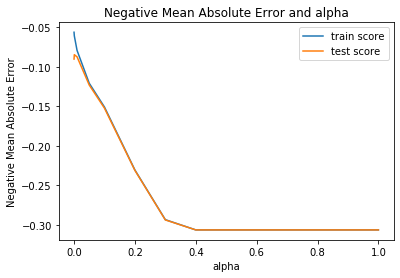

In [260]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [261]:
alpha = .001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [262]:
lasso.coef_

array([ 0.00000000e+00,  2.03987565e-02, -6.17415494e-02, -1.93865452e-02,
        3.91824853e-03,  2.04093545e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.94724492e-03,  0.00000000e+00,  7.09133843e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.07303612e-03,
       -2.81231200e-03, -1.66260845e-02,  1.00826196e-02,  5.75657609e-03,
       -0.00000000e+00,  1.51162259e-02,  1.85424922e-02,  7.40204537e-03,
        3.78450731e-03,  1.12079881e-02,  1.42536191e-02,  1.59886735e-03,
        2.37282664e-03,  2.25309121e-02,  7.67994188e-02, -6.48982708e-03,
       -2.57317302e-03,  7.92254346e-04,  5.96670454e-04,  0.00000000e+00,
        7.70209750e-03, -1.90962438e-04,  0.00000000e+00,  0.00000000e+00,
       -2.58324906e-05, -0.00000000e+00, -1.14811202e-02, -7.17675558e-04,
       -0.00000000e+00,  2.20387805e-02,  9.87227036e-03,  4.13407958e-02,
        2.50700597e-02,  1.50312257e-03,  8.04465636e-03,  2.19289326e-03,
        0.00000000e+00, -

#### Checking for the scores

In [263]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9489293415680314


In [264]:
y_test_pred_ridge = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9033838510866945


#### Validated the scores for range for .0001 to 1 and the best value was at .001

#### Getting the column list

In [265]:
coefficeints = pd.Series(lasso.coef_ , index  = X_train.columns)

In [266]:
coefficeints.count()

277

In [267]:
coefficeints[coefficeints != 0].count()

191

In [268]:
Top_predictors = pd.concat([coefficeints.sort_values().head(10), coefficeints.sort_values().tail(10)])
Top_predictors.sort_values(ascending  = False)

TotalArea               0.076799
GrLivArea               0.070913
MSZoning_RL             0.041341
SaleType_New            0.036291
OverallQual_8           0.034903
OverallQual_9           0.031231
SaleCondition_Normal    0.030580
MSZoning_RM             0.025070
Neighborhood_Crawfor    0.024460
TotalBathrooms          0.022531
OverallQual_3          -0.012566
Functional_Maj2        -0.012751
BsmtQual_TA            -0.012804
Neighborhood_MeadowV   -0.014860
KitchenAbvGr           -0.016626
OverallCond_5          -0.018859
YearRemodAdd           -0.019387
OverallCond_4          -0.022080
OverallCond_3          -0.025349
YearBuilt              -0.061742
dtype: float64

### Model Interpretation

#### Now we can comment on the best predictors for this model.
    The Lasso model also follows similar pattern as ridge but has few other predictors on top Area columns(TotalArea ,GrLivArea) show positive impact. Another high positive impact is from MSZoning_RL and MSZoning_RM which is for Residential Areas with Low density and Medium Density meaning bigger lots and houses this also follows the expectation. OverallQuality of the House if it is high 8 or 9 has high positive impact and so does the SaleType_New meaning new construction houses Sold. If the house sale was normal(not a foreclosure etc) that also tends to have a positive impact. The Crawford neighbourhood makes an appearance in the top 10 here in this model too. The negative predictors also follow similar suit where Age of a house built or remodelled are penalized along with if OverallConditions are relatively below average. Also if for a home some deductions(Functions_MAJ2) are there than it will also negatively impact the price.
    
    So based on Our model our recommendation would be to go after Homes with bigger Area in a Zone with Medium or Low density preferabbly Crawford and a new home this will likely fetch the best price.
    

## Subjective Questions Portion

#### Doubling the alpha for Question 1 for both ridge and lasso

In [269]:
alpha = 800
ridge = Ridge(alpha = alpha)

ridge.fit(X_train,y_train)
ridge.coef_

array([ 4.10616212e-03,  1.36276705e-02, -1.02704662e-02, -1.74852533e-02,
        9.84934817e-03,  1.57728535e-02, -6.45595512e-04,  2.18611157e-03,
        1.87065511e-02,  2.34065893e-02,  1.13231206e-02,  2.72921949e-02,
        5.91134178e-03,  6.49419751e-04,  1.26242189e-02,  1.04602823e-02,
        4.39908217e-03, -5.99197673e-03,  1.81050395e-02,  1.21737265e-02,
       -6.66722129e-03,  1.49663012e-02,  1.64535756e-02,  7.91866601e-03,
        7.05543517e-03,  3.94595399e-03,  9.79249633e-03,  1.50789171e-03,
        2.35854536e-03,  1.63234313e-02,  2.80936177e-02, -9.31566977e-03,
        2.92831766e-04,  6.68573029e-04,  5.16147019e-04,  6.15196437e-03,
        6.50529140e-03,  1.65707597e-03, -1.62388965e-04, -9.33865111e-05,
       -1.50852656e-03, -3.58284778e-04, -6.87559553e-03, -3.91150380e-03,
       -2.05925955e-03,  5.12407751e-03,  7.59110948e-04,  8.39435338e-03,
       -5.10993890e-03,  2.49975013e-03,  4.88074883e-03,  3.49241807e-03,
       -9.80025869e-04, -

In [270]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9281220637930735


In [271]:
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.898267965544949


In [272]:
coefficeints = pd.Series(ridge.coef_ , index  = X_train.columns)

In [273]:
coefficeints[coefficeints > 0].count()

135

In [274]:
coefficeints = pd.Series(ridge.coef_ , index  = X_train.columns)

In [275]:
Top_predictors = pd.concat([coefficeints.sort_values().head(10), coefficeints.sort_values().tail(10)])
Top_predictors.sort_values(ascending  =False)

TotalArea               0.028094
GrLivArea               0.027292
1stFlrSF                0.023407
TotalBsmtSF             0.018707
TotRmsAbvGrd            0.018105
OverallQual_9           0.018063
OverallQual_8           0.016642
GarageArea              0.016454
TotalBathrooms          0.016323
BsmtFinSF1              0.015773
BsmtQual_TA            -0.009929
Neighborhood_MeadowV   -0.009986
OverallQual_4          -0.010264
YearBuilt              -0.010270
Neighborhood_IDOTRR    -0.010575
OverallCond_4          -0.011065
KitchenQual_TA         -0.011384
OverallQual_3          -0.012689
OverallCond_3          -0.015847
YearRemodAdd           -0.017485
dtype: float64

#### Doubling the Alpha for Lasso for Question 1

In [276]:
alpha = .002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [277]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.944064488637227


In [278]:
y_test_pred_ridge = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9055720993874782


In [279]:
coefficeints = pd.Series(lasso.coef_ , index  = X_train.columns)

In [280]:
Top_predictors = pd.concat([coefficeints.sort_values().head(10), coefficeints.sort_values().tail(10)])
Top_predictors.sort_values(ascending  = False)

TotalArea               0.081733
GrLivArea               0.069226
OverallQual_8           0.035068
SaleType_New            0.034982
OverallQual_9           0.034249
SaleCondition_Normal    0.026394
Neighborhood_Crawfor    0.023738
TotalBathrooms          0.023118
BsmtFinSF1              0.022697
OverallQual_10          0.021047
Neighborhood_IDOTRR    -0.010764
GarageType_No Garage   -0.012084
OverallQual_3          -0.012796
Neighborhood_MeadowV   -0.014244
KitchenAbvGr           -0.014879
OverallCond_5          -0.016285
OverallCond_4          -0.020735
YearRemodAdd           -0.021223
OverallCond_3          -0.025846
YearBuilt              -0.052290
dtype: float64

In [281]:
coefficeints[coefficeints > 0].count()

79

### Removing the most important predictors for the Question 3

In [282]:
X_ques = X_train

In [283]:
X_ques_test = X_test

In [284]:
X_ques.shape

(1011, 277)

In [285]:
X_ques_test.shape

(434, 277)

##### Top 5 predictors were <br>
    TotalArea               0.076799<br>
    GrLivArea               0.070913<br>
    YearBuilt              -0.061742<br>
    MSZoning_RL             0.041341<br>
    SaleType_New            0.036291<br>

In [286]:
X_ques.drop(['TotalArea','GrLivArea','YearBuilt','MSZoning_RL','SaleType_New'],axis = 1, inplace=True)

In [287]:
X_ques.shape

(1011, 272)

In [288]:
X_ques_test.drop(['TotalArea','GrLivArea','YearBuilt','MSZoning_RL','SaleType_New'],axis = 1, inplace=True)

In [289]:
X_ques_test.shape

(434, 272)

In [290]:
alpha = .001
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [291]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9457317931156687


In [292]:
y_test_pred_ridge = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8978553739136371


In [293]:
coefficeints = pd.Series(lasso.coef_ , index  = X_train.columns)

In [294]:
Top_predictors = pd.concat([coefficeints.sort_values().head(10), coefficeints.sort_values().tail(10)])
Top_predictors.sort_values(ascending  = False)

2ndFlrSF                 0.088452
1stFlrSF                 0.087205
TotalBsmtSF              0.042662
OverallQual_8            0.037750
SaleCondition_Partial    0.035605
OverallQual_9            0.033223
SaleCondition_Normal     0.032295
TotalBathrooms           0.025418
CentralAir_Y             0.022123
OverallQual_10           0.022094
OverallCond_5           -0.013121
OverallQual_3           -0.015640
KitchenAbvGr            -0.016838
Neighborhood_MeadowV    -0.017413
Neighborhood_IDOTRR     -0.018765
Neighborhood_OldTown    -0.019269
BsmtQual_TA             -0.019928
OverallCond_4           -0.021315
OverallCond_3           -0.024966
YearRemodAdd            -0.025202
dtype: float64

#### The next top 5 predictors are now <br>

    2ndFlrSF                 0.088452 
    1stFlrSF                 0.087205 
    TotalBsmtSF              0.042662 
    OverallQual_8            0.037750 
    SaleCondition_Partial    0.035605 